In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq
import seaborn as sns
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import sklearn
from sklearn.decomposition import PCA
import itertools
import mdtraj as md


This is a one millsecond trajectory of ubiquitin generated from DEShaw Research:

https://pubs.acs.org/doi/abs/10.1021/acs.jpcb.6b02024

Trajectory from DESRES can be downloaded here:
https://www.dropbox.com/s/qk4winh3y66bynm/ubq.desres.s500.zip?dl=0

It can be compared to an NMR ensmeble:
https://www.wwpdb.org/pdb?id=pdb_00002kox

In [2]:
pdb='/Users/Kerenattiku/Desktop/AggR_DA_MD/AggR_DA_stripped_structure.pdb'
trajectory='/Users/Kerenattiku/Desktop/AggR_DA_MD/AggR_DA_stripped_trajectory.dcd'
outdir='/Users/Kerenattiku/Desktop/AggR_DA_MD/outdir'

if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trajectory:",trajectory)

outdir: /Users/Kerenattiku/Desktop/AggR_DA_MD/outdir
pdb: /Users/Kerenattiku/Desktop/AggR_DA_MD/AggR_DA_stripped_structure.pdb
trajectory: /Users/Kerenattiku/Desktop/AggR_DA_MD/AggR_DA_stripped_trajectory.dcd


In [3]:
trj = md.load(trajectory, top=pdb,stride=5)
trj.center_coordinates()
trj.superpose(trj[0])
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [4]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4423

Number of residues: 266

Number of frames: 6000

Starting frame: 0

Last frame: 6000

sequence:  [MET1, LYS2, LEU3, LYS4, GLN5, ASN6, ILE7, GLU8, LYS9, GLU10, ILE11, ILE12, LYS13, ILE14, ASN15, ASN16, ILE17, ARG18, ILE19, HIS20, GLN21, TYR22, THR23, VAL24, LEU25, TYR26, THR27, SER28, ASN29, CYS30, THR31, ILE32, ASP33, VAL34, TYR35, THR36, LYS37, GLU38, GLY39, SER40, ASN41, THR42, TYR43, LEU44, ARG45, ASN46, GLU47, LEU48, ILE49, PHE50, LEU51, GLU52, ARG53, GLY54, ILE55, ASN56, ILE57, SER58, VAL59, ARG60, LEU61, GLN62, LYS63, LYS64, LYS65, SER66, THR67, VAL68, ASN69, PRO70, PHE71, ILE72, ALA73, ILE74, ARG75, LEU76, SER77, SER78, ASP79, THR80, LEU81, ARG82, ARG83, LEU84, LYS85, ASP86, ALA87, LEU88, MET89, ILE90, ILE91, TYR92, GLY93, ILE94, SER95, LYS96, VAL97, ASP98, ALA99, CYS100, SER101, CYS102, PRO103, ASN104, TRP105, SER106, LYS107, GLY108, ILE109, ILE110, VAL111, ALA112, ASP113, ALA114, ASP115, ASP116, SER117, VAL118, LEU119, ASP120, THR121, 

In [5]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id
#residue_num

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'C', 'C', ..., 'C', 'C', 'NA'],
       ['C', 'C', 'C', ..., 'C', 'C', 'NA'],
       ['C', 'C', 'C', ..., 'C', 'C', 'NA'],
       ...,
       ['C', 'C', 'C', ..., 'C', 'C', 'NA'],
       ['C', 'C', 'C', ..., 'C', 'C', 'NA'],
       ['C', 'C', 'C', ..., 'C', 'C', 'NA']], dtype='<U2')

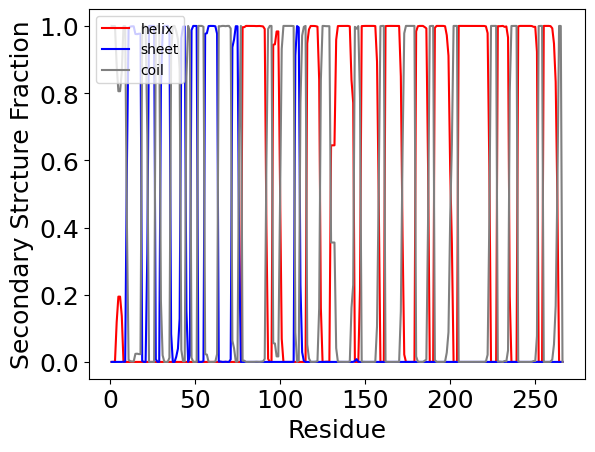

In [7]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspC=np.copy(dssp)

 dsspH[dsspH=='H']=1                                                                                    
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                     
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspH) 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 

 dsspC[dsspC=='H']=0
 dsspC[dsspC=='E']=0
 dsspC[dsspC=='C']=1
 dsspC[dsspC=='NA']=0
 dsspC=dsspC.astype(int)
 TotalC=np.sum(dsspC,axis=1) 
 Cprop=np.sum(dsspC,axis=0).astype(float)/len(dsspC) 
 return Hprop, Eprop, Cprop

Hprop,Eprop,Cprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')
plt.plot(residue_num, Cprop,c='grey',label='coil')


plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


(214.0, 223.0)

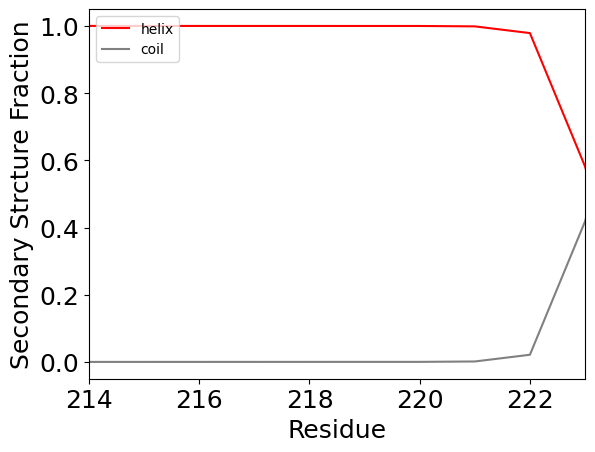

In [8]:
#looking at residues that interact with the ligand 
#from the DNA binding domain that may potentially be the information carrier 
# from the ligand binding domain to the DNA binding domain
# Residues of interest are 215, 219, 222 
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspC=np.copy(dssp)

 dsspH[dsspH=='H']=1                                                                                    
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                     
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspH) 

 #dsspE[dsspE=='H']=0
 #dsspE[dsspE=='E']=1
 #dsspE[dsspE=='C']=0
 #dsspE[dsspE=='NA']=0
 #dsspE=dsspE.astype(int)
 #TotalE=np.sum(dsspE,axis=1) 
 #Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 

 dsspC[dsspC=='H']=0
 dsspC[dsspC=='E']=0
 dsspC[dsspC=='C']=1
 dsspC[dsspC=='NA']=0
 dsspC=dsspC.astype(int)
 TotalC=np.sum(dsspC,axis=1) 
 Cprop=np.sum(dsspC,axis=0).astype(float)/len(dsspC) 
 return Hprop, Eprop, Cprop

Hprop,Eprop,Cprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
#plt.plot(residue_num,Eprop,c='b',label='sheet')
plt.plot(residue_num, Cprop,c='grey',label='coil')


plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(214,223)


SS: H [ 78  79  80  81  82  83  84  85  86  87  88  89  90  91  96  97  98  99
 116 117 118 119 120 121 122 133 134 135 136 137 138 139 140 141 148 149
 150 151 152 153 154 155 156 162 163 164 165 166 167 168 169 170 180 181
 182 183 184 185 186 191 192 193 194 195 196 197 198 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 228 229 230 231 232
 233 234 240 241 242 243 244 245 246 247 248 249 250 251 255 256 257 258
 259 260 261]
SS: E [ 11  12  13  14  15  16  17  18  23  24  25  26  31  32  33  34  35  42
  43  44  48  49  50  51  56  57  58  59  60  61  62  63  72  73  74  75
 109 110 111]
SS: I []
SS: G []
SS: B []
SS: T [ 53  54 188 202 236]
SS: S [ 21  46  64  68 108 176 189 226 238 252 253]
SS:   [  1   2   3   9  19  27  36  40  47  52  55  69  71  77  94  95 106 107
 113 115 126 160 161 177 178 179 190 204 225 227 237 239 254 264 265]


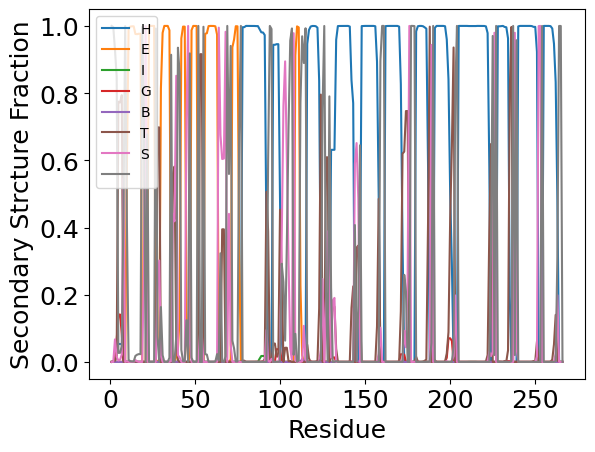

In [9]:
dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1                                                                                      
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return Sprop

for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


SS: H [ 78  79  80  81  82  83  84  85  86  87  88  89  90  91  96  97  98  99
 116 117 118 119 120 121 122 133 134 135 136 137 138 139 140 141 148 149
 150 151 152 153 154 155 156 162 163 164 165 166 167 168 169 170 180 181
 182 183 184 185 186 191 192 193 194 195 196 197 198 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 228 229 230 231 232
 233 234 240 241 242 243 244 245 246 247 248 249 250 251 255 256 257 258
 259 260 261]
SS: E [ 11  12  13  14  15  16  17  18  23  24  25  26  31  32  33  34  35  42
  43  44  48  49  50  51  56  57  58  59  60  61  62  63  72  73  74  75
 109 110 111]
SS: I []
SS: G []
SS: B []
SS: T [ 53  54 188 202 236]
SS: S [ 21  46  64  68 108 176 189 226 238 252 253]
SS:   [  1   2   3   9  19  27  36  40  47  52  55  69  71  77  94  95 106 107
 113 115 126 160 161 177 178 179 190 204 225 227 237 239 254 264 265]


(214.0, 223.0)

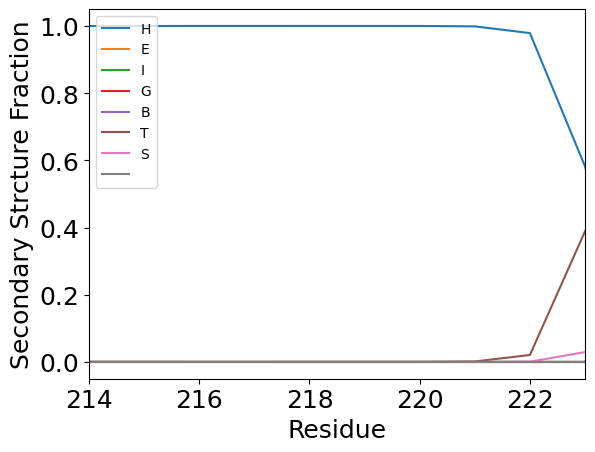

In [10]:
#another way to confirm that the residues of interest above exist only in the alpha 4 helix linker region of the DBD 
ssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1                                                                                      
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return Sprop

for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(214, 223)

In [11]:
#Find all the frames where a given residue is H or E
residue_number=39
array_index=residue_number-0
print(np.asarray(residue_num)[array_index])
helix_frames=np.where(dssp[:,array_index]=='H')[0]
beta_frames=np.where(dssp[:,array_index]=='E')[0]

print("Residue %s"%np.asarray(residue_num)[array_index])
print("helix frames:",len(helix_frames),helix_frames)
print("beta frames:",len(beta_frames),beta_frames)

40
Residue 40
helix frames: 0 []
beta frames: 237 [ 510 1065 1562 1563 1564 1565 1566 1568 1570 1571 1572 1573 1575 1576
 1577 1578 1580 1581 1582 1583 1584 1585 1587 1588 1589 1590 1591 1592
 1593 1594 1595 1596 1597 1598 1599 1600 1601 1602 1603 1604 1605 1606
 1607 1608 1609 1610 1611 1612 1613 1614 1619 1623 1653 1657 1715 1719
 1720 1721 1722 1739 1740 1742 1743 1745 1848 1858 1859 1860 1861 1862
 1983 2008 2009 2017 2018 2019 2020 2024 2025 2026 2027 2030 2031 2033
 2034 2035 2036 2037 2038 2039 2040 2041 2042 2045 2046 2048 2049 2050
 2051 2053 2054 2055 2056 2057 2058 2061 2062 2063 2064 2066 2067 2074
 2078 2087 2092 2093 2094 2095 2096 2097 2098 2099 2100 2101 2102 2103
 2121 2126 2127 2133 2141 2149 2156 2161 2216 2229 2230 2231 2232 2233
 2235 2241 2249 2257 2266 2270 2277 2312 2337 2339 2345 2348 2352 2354
 2366 2377 2378 2380 2381 2485 2487 2538 2600 2645 2710 2757 2758 2802
 2821 2865 2926 2965 2972 2973 2977 2979 2980 2983 2987 2991 2992 3006
 3009 3010 3012 3016 3017 3

In [12]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [13]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices = indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [14]:
sequence

' [MET1, LYS2, LEU3, LYS4, GLN5, ASN6, ILE7, GLU8, LYS9, GLU10, ILE11, ILE12, LYS13, ILE14, ASN15, ASN16, ILE17, ARG18, ILE19, HIS20, GLN21, TYR22, THR23, VAL24, LEU25, TYR26, THR27, SER28, ASN29, CYS30, THR31, ILE32, ASP33, VAL34, TYR35, THR36, LYS37, GLU38, GLY39, SER40, ASN41, THR42, TYR43, LEU44, ARG45, ASN46, GLU47, LEU48, ILE49, PHE50, LEU51, GLU52, ARG53, GLY54, ILE55, ASN56, ILE57, SER58, VAL59, ARG60, LEU61, GLN62, LYS63, LYS64, LYS65, SER66, THR67, VAL68, ASN69, PRO70, PHE71, ILE72, ALA73, ILE74, ARG75, LEU76, SER77, SER78, ASP79, THR80, LEU81, ARG82, ARG83, LEU84, LYS85, ASP86, ALA87, LEU88, MET89, ILE90, ILE91, TYR92, GLY93, ILE94, SER95, LYS96, VAL97, ASP98, ALA99, CYS100, SER101, CYS102, PRO103, ASN104, TRP105, SER106, LYS107, GLY108, ILE109, ILE110, VAL111, ALA112, ASP113, ALA114, ASP115, ASP116, SER117, VAL118, LEU119, ASP120, THR121, PHE122, LYS123, SER124, ILE125, ASP126, HIS127, ASN128, ASP129, ASP130, SER131, ARG132, ILE133, THR134, SER135, ASP136, LEU137, ILE138, T

In [15]:
#Heres a function to plot a phi/psi ramachandran plot: 

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




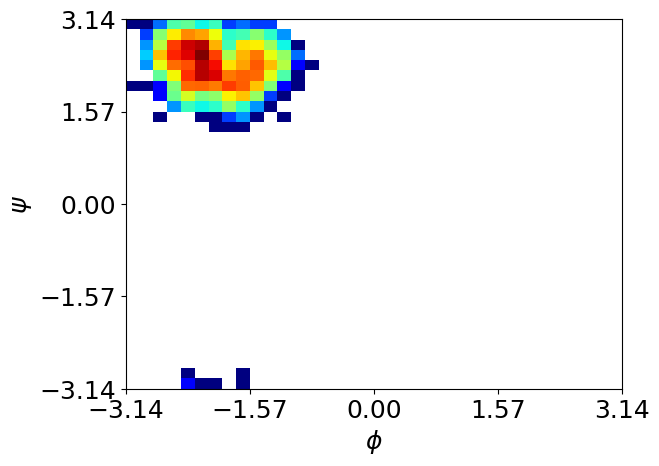

In [16]:
# Analyzing phi/psi angles for residue of interest and compare to apo residue conformations. Give insight into change in backbone. 
plot_phipsi(75)

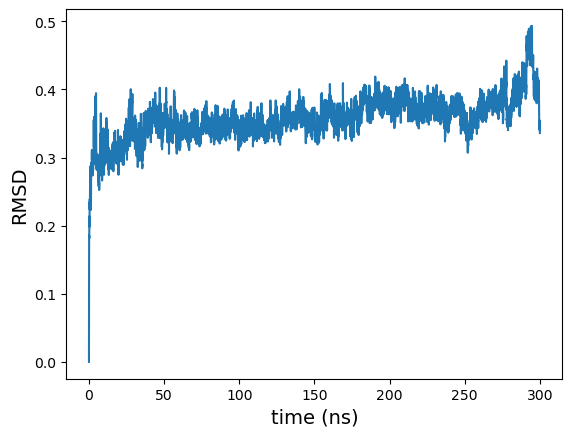

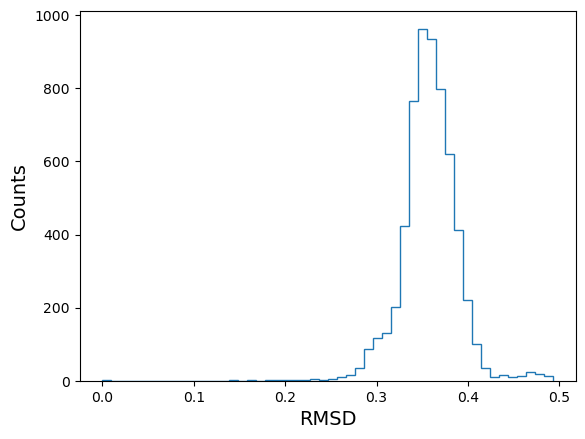

In [17]:
#Lets Calculate the RMSD and make a histogram from the starting structure. 
# Compare RMSD to apo structure to determine effect of ligand binding on structure variability over time. 
time=np.linspace(0,300,trj.n_frames)
rmsd = md.rmsd(trj, trj, 0)
plt.plot(time,rmsd)
plt.ylabel('RMSD',size=14);
plt.xlabel('time (ns)',size=14)
plt.show()
plt.clf()

plt.hist(rmsd,histtype='step',bins=50)
plt.ylabel('Counts',size=14);
plt.xlabel('RMSD',size=14)
plt.show()

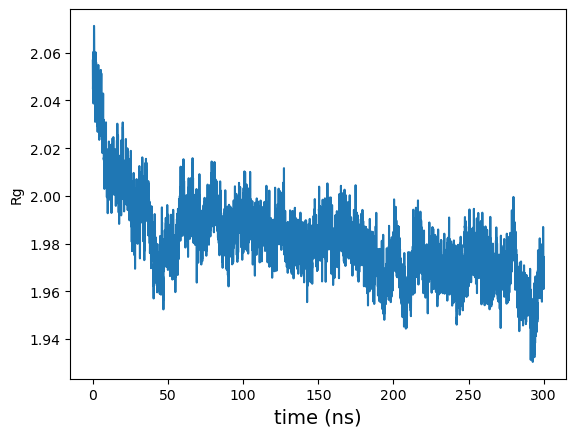

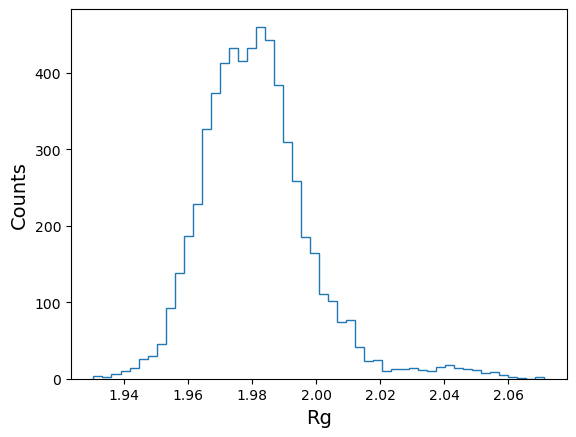

In [18]:
#Lets calculate the radius of gyration and make a histogram. 
#Compare to apo structure to evaluate the impact of ligand binding on protein expansition and compaction. 
rg=md.compute_rg(trj, masses=None)
plt.plot(time,rg)
plt.ylabel('Rg');
plt.xlabel('time (ns)',size=14)
plt.show()
plt.clf()

plt.hist(rg,histtype='step',bins=50)
plt.ylabel('Counts',size=14);
plt.xlabel('Rg',size=14)
plt.show()

In [50]:
#Here, I want to find all reidues that that makes contact with the ligand over time
pip install pyblock

  Using cached pyblock-0.6-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [51]:
import pyblock
from itertools import chain
def get_blockerrors_pyblock(Data, bound_frac):
    n_data = len(Data[0])
    block_errors = []
    ave = []
    for i in range(0, n_data):
        data = Data[:, i]
        average = np.average(data)
        if (average != 0) and (average != 1):
            reblock_data = pyblock.blocking.reblock(data)
            opt = pyblock.blocking.find_optimal_block(
                len(data), reblock_data)[0]
            if type(opt) != int:
                opt = 10
            opt_block = reblock_data[opt]
            be = opt_block[4]
        else:
            be = 0
        ave.append(average)
        block_errors.append(be)
    ave_bf = np.asarray(ave)/bound_frac
    be_bf = np.asarray(block_errors)/bound_frac
    return ave_bf, be_bf

In [53]:
contact_pairs = np.zeros((265, 2))
ligand_residue_index = 265
for i in range(0, 265):
    contact_pairs[i] = [i, ligand_residue_index]
contact = md.compute_contacts(trj, contact_pairs, scheme='closest-heavy')
contacts = np.asarray(contact[0]).astype(float)
cutoff = 0.6
contact_matrix = np.where(contacts < cutoff, 1, 0)
contact_prob = np.sum(contact_matrix, axis=0)/trj.n_frames
np.savetxt(outdir+'contacts.traj.dat', contact_matrix, '%i')
contact_rows = np.sum(contact_matrix, axis=1)
contact_frames = np.where(contact_rows > 0)[0]
nocontact_frames = np.where(contact_rows == 0)[0]
contact_fraction = np.sum(np.where(contact_rows > 0, 1, 0))/len(contact_rows)
print("Fraction Bound:", contact_fraction)

Fraction Bound: 1.0


/opt/anaconda3/envs/AggR_DA_MD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/AggR_DA_MD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


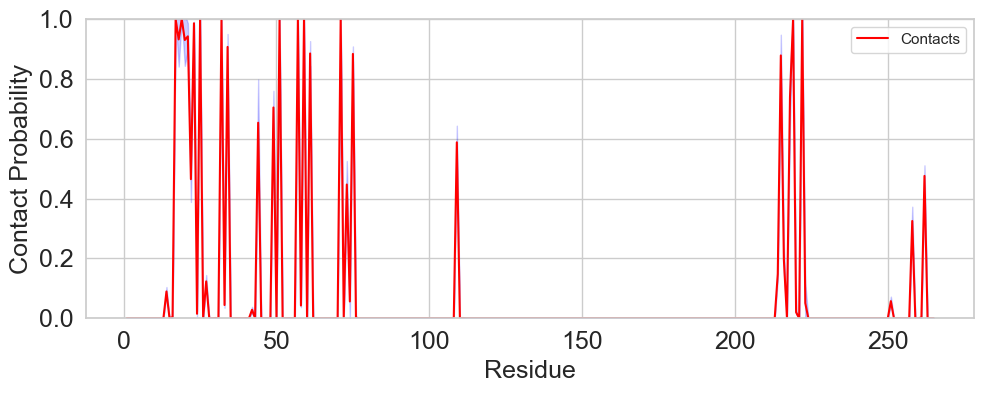

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+01 0.00000000e+00 0.00000000e+00]
 [1.10000000e+01 0.00000000e+00 0.00000000e+00]
 [1.20000000e+01 0.00000000e+00 0.00000000e+00]
 [1.30000000e+01 0.00000000e+00 0.00000000e+00]
 [1.40000000e+01 8.95000000e-02 1.48739839e-02]
 [1.50000000e+01 0.00000000e+00 0.00000000e+00]
 [1.60000000e+01 3.83333333e-03 2.62378402e-03]
 [1.70000000e+01 9.99833333e-01 1.67112299e-04]
 [1.80000000e+01 9.31833333e-01 9.08203125e-02]
 [1.90000000e+01 1.00000000e+00 0.00000000e+00]
 [2.00000000e+01 9.29833333e-01 8.64257812e-02]
 [2.10000000e+01 9.42000000e-01 4.394205

<Figure size 640x480 with 0 Axes>

In [58]:
# Total Contacts with block errors shown in blue
contact_ave, contact_pyb_be = get_blockerrors_pyblock(contact_matrix, 1.0)
contact_ave, contact_pyb_be_max = get_blockerrors_pyblock(contact_matrix, 1.0)
contact_be = np.column_stack((range(1,ligand_residue_index+1), contact_ave, contact_pyb_be))
contact_be_max = np.column_stack((range(1,ligand_residue_index+1), contact_ave, contact_pyb_be_max))
np.savetxt('%s/AggR_DA_contact.be.pyblock.dat' % outdir, contact_be, '%.4f')
np.savetxt('%s/AggR_DA_contact.be.pyblock.max.dat' % outdir, contact_be_max, '%.4f')
sns.set(style='whitegrid')
Contact = contact_be
plt.figure(figsize=(10, 4))
sns.lineplot(x=Contact[:, 0], y=Contact[:, 1],
             color='red', label='Contacts')
plt.fill_between(Contact[:, 0], Contact[:, 1]+Contact[:, 2],
                 Contact[:, 1]-Contact[:, 2], color='blue', alpha=0.2)
plt.xlabel('Residue', size=18)
plt.ylabel('Contact Probability', size=18)
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.savefig(outdir+'AggR_DA_ContactFraction.byResidue.ClosestHeavy.png')
plt.ylim(0, 1)
plt.show()
plt.clf()
print(Contact)

In [19]:
#Lets identify subtantially populated hydrogen bonds
hbonds = md.baker_hubbard(trj, periodic=False)
label = lambda hbond : '%s -- %s' % (trj.topology.atom(hbond[0]), trj.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))
    

LEU3-N -- GLU8-OE1
GLN5-N -- GLN5-OE1
ASN6-N -- LEU3-O
ASN6-N -- ASN6-OD1
ILE7-N -- LYS4-O
GLU8-N -- LYS4-O
LYS9-N -- GLU8-OE1
LYS9-N -- GLU8-OE2
GLU10-N -- GLU8-O
GLU10-N -- LYS63-O
ILE11-N -- GLU10-OE1
ILE11-N -- GLU10-OE2
ILE12-N -- LEU61-O
ILE14-N -- VAL59-O
ASN15-N -- PHE251-O
ASN16-N -- SER58-OG
ASN16-ND2 -- HIS250-O
ILE17-N -- ILE57-O
ILE19-N -- ILE55-O
HIS20-N -- ARG18-O
HIS20-N -- LIG266-O1
HIS20-N -- LIG266-O2
HIS20-NE2 -- GLU171-OE1
HIS20-NE2 -- GLU171-OE2
GLN21-N -- LIG266-O1
GLN21-N -- LIG266-O2
GLN21-NE2 -- LEU76-O
THR23-N -- LEU51-O
VAL24-N -- ILE74-O
LEU25-N -- ILE49-O
TYR26-N -- ILE72-O
THR27-N -- GLU47-O
SER28-N -- TYR26-O
ASN29-N -- SER28-OG
ASN29-N -- PRO70-O
ASN29-ND2 -- LYS65-O
ASN29-ND2 -- ASN69-O
CYS30-N -- THR27-O
CYS30-N -- SER28-O
CYS30-N -- PRO70-O
THR31-N -- GLN62-O
ILE32-N -- LEU44-O
ASP33-N -- ARG60-O
VAL34-N -- THR42-O
TYR35-N -- SER58-O
THR36-N -- ASN41-OD1
GLU38-N -- THR36-OG1
GLY39-N -- THR36-OG1
GLY39-N -- THR36-O
SER40-N -- LYS107-O
ASN41-N -- GLY39

In [20]:
for hbond in hbonds:
 donor = top.atom(hbond[0])
 acc = top.atom(hbond[2])
 print(hbond,donor,acc)

[ 41  42 143] LEU3-N GLU8-OE1
[82 83 93] GLN5-N GLN5-OE1
[ 99 100  59] ASN6-N LEU3-O
[ 99 100 107] ASN6-N ASN6-OD1
[113 114  81] ILE7-N LYS4-O
[132 133  81] GLU8-N LYS4-O
[147 148 143] LYS9-N GLU8-OE1
[147 148 144] LYS9-N GLU8-OE2
[169 170 146] GLU10-N GLU8-O
[ 169  170 1083] GLU10-N LYS63-O
[184 185 180] ILE11-N GLU10-OE1
[184 185 181] ILE11-N GLU10-OE2
[ 203  204 1044] ILE12-N LEU61-O
[ 244  245 1001] ILE14-N VAL59-O
[ 263  264 4152] ASN15-N PHE251-O
[277 278 982] ASN16-N SER58-OG
[ 286  288 4132] ASN16-ND2 HIS250-O
[291 292 974] ILE17-N ILE57-O
[334 335 941] ILE19-N ILE55-O
[353 354 333] HIS20-N ARG18-O
[ 353  354 4392] HIS20-N LIG266-O1
[ 353  354 4394] HIS20-N LIG266-O2
[ 364  365 2807] HIS20-NE2 GLU171-OE1
[ 364  365 2808] HIS20-NE2 GLU171-OE2
[ 370  371 4392] GLN21-N LIG266-O1
[ 370  371 4394] GLN21-N LIG266-O2
[ 382  384 1307] GLN21-NE2 LEU76-O
[408 409 876] THR23-N LEU51-O
[ 422  423 1264] VAL24-N ILE74-O
[438 439 837] LEU25-N ILE49-O
[ 457  458 1235] TYR26-N ILE72-O
[478 479 

In [21]:
import mdtraj as md

# Assuming `trj` is your trajectory object
hbonds = md.baker_hubbard(trj, periodic=False)

# Define a function to label the hydrogen bonds with their indices
label_with_index = lambda hbond, index: '%d: %s -- %s' % (index, trj.topology.atom(hbond[0]), trj.topology.atom(hbond[2]))

# Loop through each hbond and print with the index
for index, hbond in enumerate(hbonds):
    print(label_with_index(hbond, index))


0: LEU3-N -- GLU8-OE1
1: GLN5-N -- GLN5-OE1
2: ASN6-N -- LEU3-O
3: ASN6-N -- ASN6-OD1
4: ILE7-N -- LYS4-O
5: GLU8-N -- LYS4-O
6: LYS9-N -- GLU8-OE1
7: LYS9-N -- GLU8-OE2
8: GLU10-N -- GLU8-O
9: GLU10-N -- LYS63-O
10: ILE11-N -- GLU10-OE1
11: ILE11-N -- GLU10-OE2
12: ILE12-N -- LEU61-O
13: ILE14-N -- VAL59-O
14: ASN15-N -- PHE251-O
15: ASN16-N -- SER58-OG
16: ASN16-ND2 -- HIS250-O
17: ILE17-N -- ILE57-O
18: ILE19-N -- ILE55-O
19: HIS20-N -- ARG18-O
20: HIS20-N -- LIG266-O1
21: HIS20-N -- LIG266-O2
22: HIS20-NE2 -- GLU171-OE1
23: HIS20-NE2 -- GLU171-OE2
24: GLN21-N -- LIG266-O1
25: GLN21-N -- LIG266-O2
26: GLN21-NE2 -- LEU76-O
27: THR23-N -- LEU51-O
28: VAL24-N -- ILE74-O
29: LEU25-N -- ILE49-O
30: TYR26-N -- ILE72-O
31: THR27-N -- GLU47-O
32: SER28-N -- TYR26-O
33: ASN29-N -- SER28-OG
34: ASN29-N -- PRO70-O
35: ASN29-ND2 -- LYS65-O
36: ASN29-ND2 -- ASN69-O
37: CYS30-N -- THR27-O
38: CYS30-N -- SER28-O
39: CYS30-N -- PRO70-O
40: THR31-N -- GLN62-O
41: ILE32-N -- LEU44-O
42: ASP33-N -- AR

[ 353  354 4392] HIS20-N LIG266-O1
[ 353  354 4394] HIS20-N LIG266-O2
[ 370  371 4392] GLN21-N LIG266-O1
[ 370  371 4394] GLN21-N LIG266-O2
[4394 4405  418] LIG266-O2 THR23-OG1


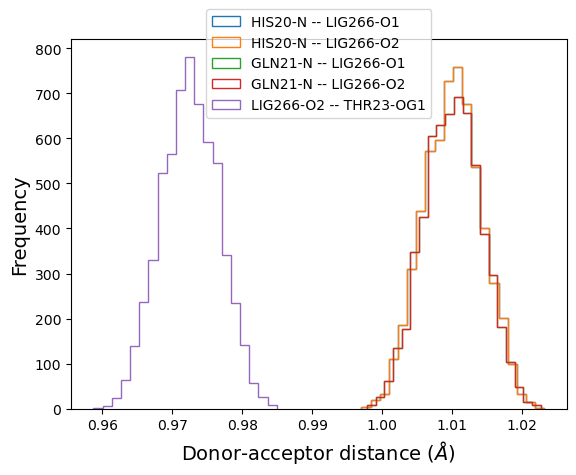

In [40]:
#loopping over every residue to find residues that form hydrogen bonds the ligand
import mdtraj as md
import matplotlib.pyplot as plt

# Assuming `trj` is your trajectory object and `top` is its topology
hbonds = md.baker_hubbard(trj, periodic=False)

# List of specific Hbond indices you want to plot
hbond_indices = [20, 21, 24, 25, 439]  # Example indices

# Define a function to label the hydrogen bonds
label = lambda hbond: '%s -- %s' % (trj.topology.atom(hbond[0]), trj.topology.atom(hbond[2]))

# Initialize the plot
plt.figure()

# Loop over the list of specific Hbond indices
for Hbond_index in hbond_indices:
    hbond = hbonds[Hbond_index]
    donor = trj.topology.atom(hbond[0])
    acc = trj.topology.atom(hbond[2])
    
    print(hbond, donor, acc)
    
    da_distance = md.compute_distances(trj, [[hbond[0], hbond[1]]], periodic=False)
    plt.hist(da_distance*10, histtype='step', bins=20, label=label(hbond))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1)
plt.ylabel('Frequency', size=14)
plt.xlabel('Donor-acceptor distance ($\AA$)', size=14)
plt.show()


[ 353  354 4392] HIS20-N LIG266-O1


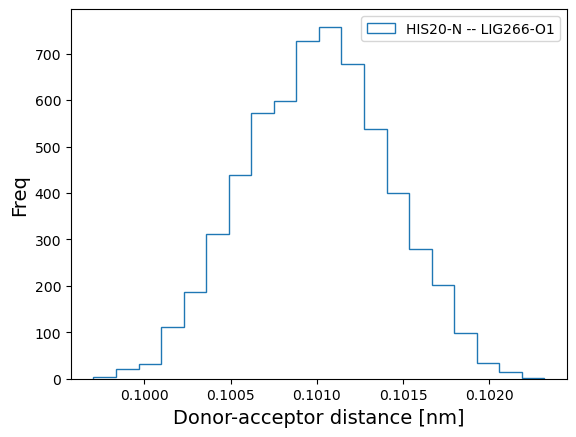

In [23]:
#Residue of interest because it's located within the ligand binding domain of the protein and was identified by PLIP to interact with AggR
Hbond_index= 20
hbond=hbonds[Hbond_index]
donor = top.atom(hbond[0])
acc = top.atom(hbond[2])
print(hbond,donor,acc)

da_distance = md.compute_distances(trj, [[hbond[0],hbond[1]]], periodic=False)
plt.hist(da_distance,histtype='step',bins=20, label=label(hbonds[Hbond_index]))
#for i in [2, 3, 4]:
#    plt.hist(da_distances[:, i], color=next(color),histtype='step',bins=10, label=label(hbonds[i]), alpha=0.5)
plt.legend()
plt.ylabel('Freq',size=14);
plt.xlabel('Donor-acceptor distance [nm]',size=14)
plt.show()

[4394 4405  418] LIG266-O2 THR23-OG1


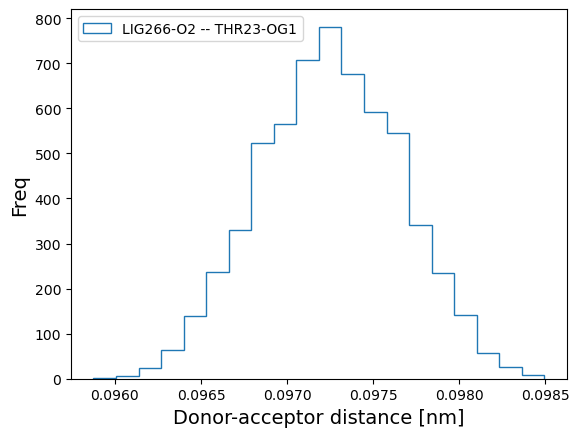

In [24]:
Hbond_index= 439
hbond=hbonds[Hbond_index]
donor = top.atom(hbond[0])
acc = top.atom(hbond[2])
print(hbond,donor,acc)

da_distance = md.compute_distances(trj, [[hbond[0],hbond[1]]], periodic=False)
plt.hist(da_distance,histtype='step',bins=20, label=label(hbonds[Hbond_index]))
#for i in [2, 3, 4]:
#    plt.hist(da_distances[:, i], color=next(color),histtype='step',bins=10, label=label(hbonds[i]), alpha=0.5)
plt.legend()
plt.ylabel('Freq',size=14);
plt.xlabel('Donor-acceptor distance [nm]',size=14)
plt.show()

In [25]:
import mdtraj as md

# Load your trajectory and topology
# Assuming `trj` is your MDTraj trajectory object

# Identify the indices of atoms in the ligand and protein
# This assumes you have some way of identifying the ligand, such as its residue name
ligand_resname = 'LIG'  # Example ligand residue name
protein_residues = [residue for residue in trj.topology.residues if residue.is_protein]
ligand_residues = [residue for residue in trj.topology.residues if residue.name == ligand_resname]

ligand_atoms = [atom.index for residue in ligand_residues for atom in residue.atoms]
protein_atoms = [atom.index for residue in protein_residues for atom in residue.atoms]

# Find hydrogen bonds in the trajectory
hbonds = md.baker_hubbard(trj, periodic=False)

# Filter hydrogen bonds to find those between ligand and protein
ligand_protein_hbonds = []
for hbond in hbonds:
    donor_index = hbond[0]
    acceptor_index = hbond[2]
    
    if (donor_index in ligand_atoms and acceptor_index in protein_atoms) or \
       (donor_index in protein_atoms and acceptor_index in ligand_atoms):
        ligand_protein_hbonds.append(hbond)

# Define a function to label the hydrogen bonds
label = lambda hbond: '%s -- %s' % (trj.topology.atom(hbond[0]), trj.topology.atom(hbond[2]))

# Print the hydrogen bonds between ligand and protein
for hbond in ligand_protein_hbonds:
    print(label(hbond))


HIS20-N -- LIG266-O1
HIS20-N -- LIG266-O2
GLN21-N -- LIG266-O1
GLN21-N -- LIG266-O2
LIG266-O2 -- THR23-OG1


The carboxylic end of the ligand interacts with residue 75 0 times.


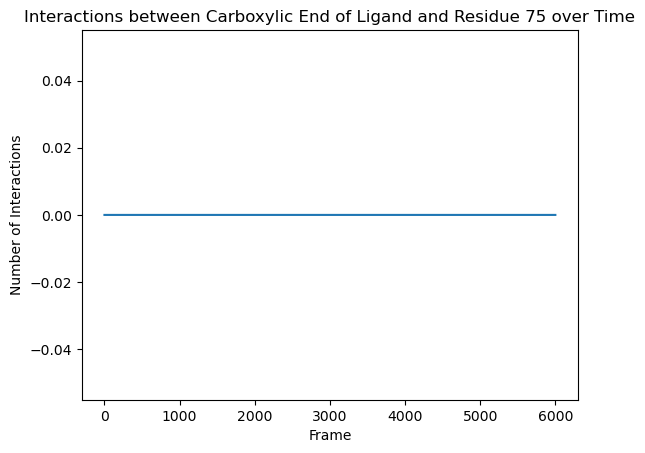

In [26]:
#the residue 75 was identified in PLIP to form a saltbrige. 
#This analysis confirms there's no hydrogen bond formed between Decanoic acid and Arg 75
import mdtraj as md
import numpy as np

# Load your trajectory and topology
# Assuming `trj` is your MDTraj trajectory object

# Identify the carboxylic end atoms of the ligand
ligand_resname = 'LIG'  # Example ligand residue name
carboxylic_atoms_names = ['O1', 'O2', 'C']  # Example atom names in the carboxylic group

ligand_residues = [residue for residue in trj.topology.residues if residue.name == ligand_resname]
carboxylic_atoms = [atom.index for residue in ligand_residues for atom in residue.atoms if atom.name in carboxylic_atoms_names]

# Identify the atoms in residue 75
residue_75 = [residue for residue in trj.topology.residues if residue.index == 75]
residue_75_atoms = [atom.index for residue in residue_75 for atom in residue.atoms]

# Find hydrogen bonds in the trajectory
hbonds = md.baker_hubbard(trj, periodic=False)

# Count interactions between carboxylic end and residue 75
interaction_count = 0

for hbond in hbonds:
    donor_index = hbond[0]
    acceptor_index = hbond[2]
    
    if (donor_index in carboxylic_atoms and acceptor_index in residue_75_atoms) or \
       (donor_index in residue_75_atoms and acceptor_index in carboxylic_atoms):
        interaction_count += 1

print(f'The carboxylic end of the ligand interacts with residue 75 {interaction_count} times.')

# Optionally, you can plot these interactions over time
interaction_counts_over_time = np.zeros(trj.n_frames)

for frame in range(trj.n_frames):
    frame_hbonds = md.baker_hubbard(trj[frame], periodic=False)
    for hbond in frame_hbonds:
        donor_index = hbond[0]
        acceptor_index = hbond[2]
        
        if (donor_index in carboxylic_atoms and acceptor_index in residue_75_atoms) or \
           (donor_index in residue_75_atoms and acceptor_index in carboxylic_atoms):
            interaction_counts_over_time[frame] += 1

plt.plot(interaction_counts_over_time)
plt.ylabel('Number of Interactions')
plt.xlabel('Frame')
plt.title('Interactions between Carboxylic End of Ligand and Residue 75 over Time')
plt.show()


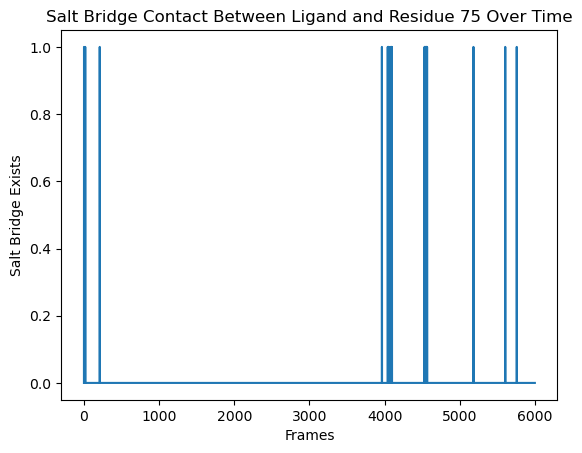

Frames where the ligand makes contact with residue 75: [   1   17  210 3964 4042 4047 4052 4055 4056 4076 4089 4092 4093 4097
 4532 4536 4538 4545 4552 4555 4556 4560 4563 4565 5182 5605 5758]


In [27]:
# finding the frames where the interaction happens
#ARG 75 forms is an important residue that is involved with ligand binding in AggR.
#Analysis in (the protein ligand interaction profiler (PLIP) shows this residue forms a salt bridge with the ligand 
#  
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load your trajectory and topology
# Assuming `trj` is your MDTraj trajectory object

# Define the indices for the carboxylate center of the ligand and the charged center of residue 75
lig_carboxylate_center = [4396]
res_75_center = [1280]

# Compute distances between the carboxylate center of the ligand and the charged center of residue 75
distances = md.compute_distances(trj, [[lig_carboxylate_center[0], res_75_center[0]]])

# Define a distance cutoff for contact (e.g., 0.5 nm)
distance_cutoff = 0.5

# Identify frames where the distance is below the cutoff
contact_frames = np.where(distances < distance_cutoff)[0]

# Create a binary array indicating contact presence
one_hot_distances = np.where(distances < distance_cutoff, 1, 0).flatten()

# Plot the contact over time
plt.plot(one_hot_distances)
plt.ylabel("Salt Bridge Exists")
plt.xlabel("Frames")
plt.title("Salt Bridge Contact Between Ligand and Residue 75 Over Time")
plt.show()

# Print the frames where the ligand makes contact with residue 75
print(f"Frames where the ligand makes contact with residue 75: {contact_frames}")


In [35]:
#atoms in the ligand that interact with the protein residue 75
print (carboxylic_atoms)
print(residue_75_atoms)

[4392, 4394]
[1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307]


(6000, 2)


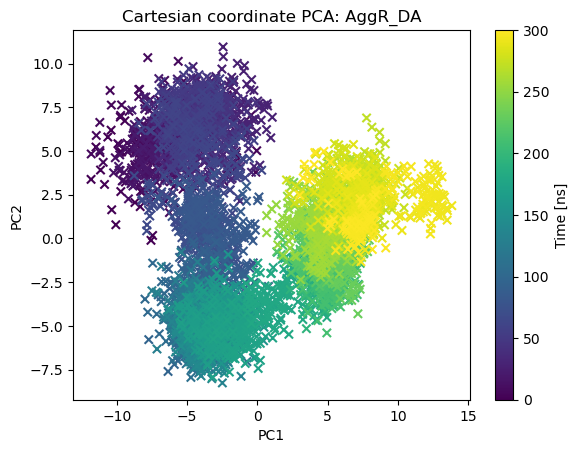

In [43]:
#identification of structural trends acroos the frames over time
import sklearn
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
trj.superpose(trj, 0)
reduced_cartesian = pca1.fit_transform(trj.xyz.reshape(trj.n_frames, trj.n_atoms * 3))
print(reduced_cartesian.shape)
#We Can plot eaceh frame as a function of the values of each PC(principal component): PC1 and PC2
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=time)
plt.xlabel('PC1')
plt.ylabel('PC2') 
plt.title('Cartesian coordinate PCA: AggR_DA')
cbar = plt.colorbar()
cbar.set_label('Time [ns]')

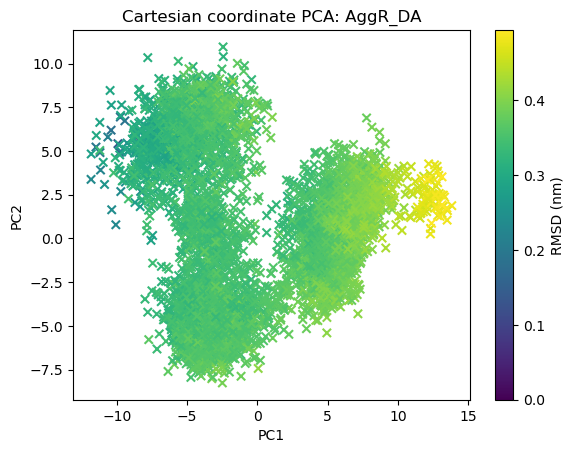

In [ ]:
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=rmsd)
plt.xlabel('PC1')
plt.ylabel('PC2') 
plt.title('Cartesian coordinate PCA: AggR_DA')
cbar = plt.colorbar()
cbar.set_label('RMSD (nm)')

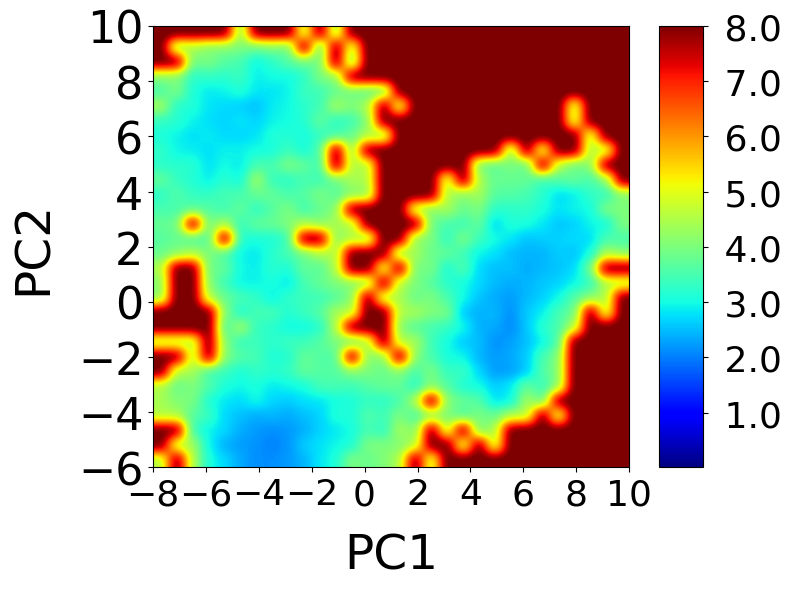

In [ ]:
###Free Energy Plot of PC1 vs. PC2

def free_energy(a, b, T, y0, ymax, x0, xmax):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], density=True, weights=None)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges

PC1=reduced_cartesian[:, 0]
PC2=reduced_cartesian[:,1]

dG,xedges,yedges=free_energy(PC2, PC1, 300, -6, 10, -8, 10)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(-8,10)
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("PC2", size=35, labelpad=15)
plt.xlabel("PC1", size=35, labelpad=15)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xticks(size='26')
plt.yticks(size='32')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='26')
plt.tight_layout()

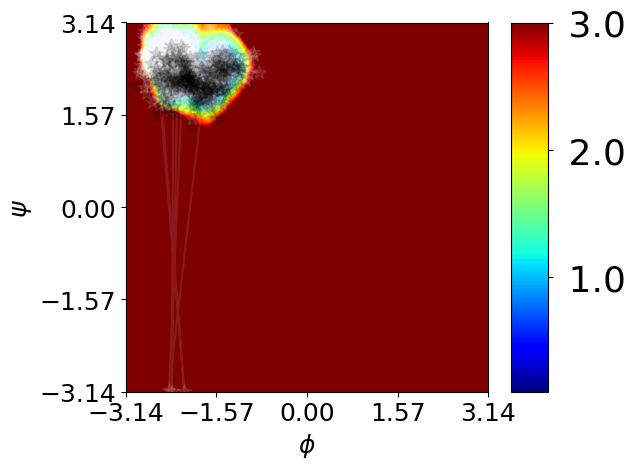

In [33]:
res = 75
phis = dihedral_dict['phi'][res]
psis = dihedral_dict['psi'][res]
chi1s = dihedral_dict['chi1'][res]

basin1_chi = np.where((chi1s < 1.57 ) & (chi1s > 0))
basin2_chi = np.where((np.abs(chi1s) < np.pi ) &  (np.abs(chi1s)> np.pi - 0.5))
def plot_phipsi_with_FES(res, frames1, frames2):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['psi'][res],dihedral_dict['phi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()
 plt.plot(dihedral_dict['phi'][res][frames1], dihedral_dict['psi'][res][frames1], color="white", marker="*", markersize=10, alpha = 0.1)
 plt.plot( dihedral_dict['phi'][res][frames2], dihedral_dict['psi'][res][frames2], color="black", marker="*", markersize=10, alpha = 0.1)
 plt.xticks([-3.14,-1.57,0,1.57,3.14],fontsize=35)
 plt.yticks([-3.14,-1.57,0,1.57,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return
plot_phipsi_with_FES(75, basin1_chi, basin2_chi)

In [ ]:
def free_energy1D(a,T,x0,xmax,bins):
    free_energy, xedges= np.histogram(
        a, bins, [x0, xmax], density=True, weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    free_energy = np.log(free_energy+.0000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xcenters

In [ ]:
#Lets Make a Contact Map
contact_maps = []
contact_distances = []
for i in range(1, 266):
    contact_map = []
    contact_distance = []
    for j in range(1, 266):
        if i == j:
            contacts = 0
        else:
            dist = md.compute_contacts(trj, [[i, j]])
            array = np.asarray(dist[0]).astype(float)
            distance = np.average(array)
            contact_distance.append(distance)
            contact = np.where(array < 0.5, 1, 0)
            contacts = np.average(contact)
        contact_map.append(contacts)
    contact_maps.append(contact_map)
    contact_distances.append(contact_distance)
final_map = np.asarray(contact_maps).astype(float)
final_distance = np.asarray(contact_distances).astype(float)


Text(0.5, 23.52222222222222, 'residue index')

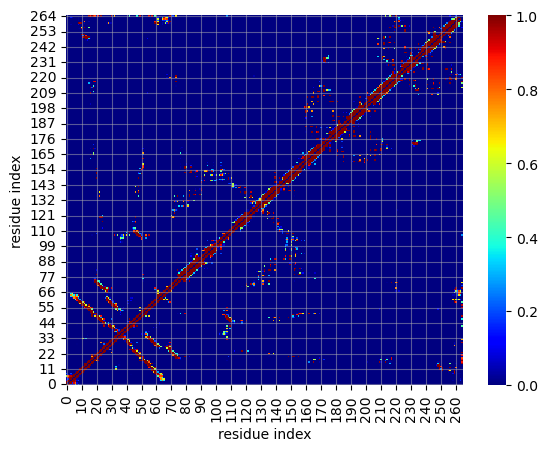

In [ ]:
ax = sns.heatmap(final_map, vmin=0.0, vmax=1.0,cmap='jet')
ax.invert_yaxis()
ax.grid(which='both', alpha=0.5)
plt.ylabel("residue index")
plt.xlabel("residue index")


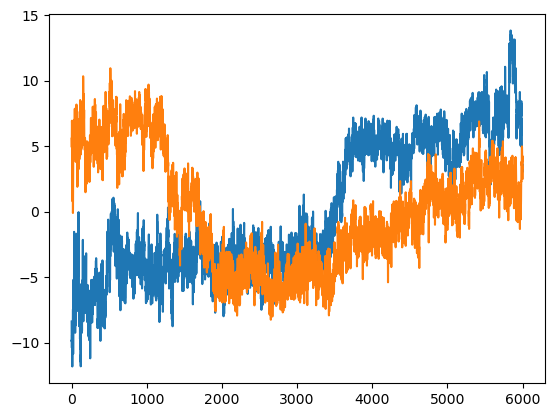

In [ ]:
##structural differences observed about different conformations that exist within ligand bound AggR
plt.plot(PC1)
plt.plot(PC2)
plt.ylabel("residue index")
plt.xlabel("Frames")


In [ ]:
#three different basins were observed to be present in the cartesian and free energy plots and this is also observed in
# the 
state1 = np.where((PC2 < 10) & (PC2 > 2.5))[0] 
state2 = np.where((PC2 < 2.5) & (PC2 > -2.5))[0] 
state3 = np.where((PC2 < 2.5) & (PC2 > -2.5))[0] 
major_state_reduced = major_state[::15]

In [ ]:
print(major_state_reduced)

[   0   21   36   51   66   85  100  115  130  145  162  177  195  211
  226  242  257  272  287  302  317  332  347  362  377  392  407  424
  439  454  469  484  499  514  532  547  562  577  592  608  624  640
  655  670  685  700  715  730  745  760  775  790  805  820  835  850
  865  880  895  910  925  940  955  970  985 1000 1015 1030 1045 1060
 1075 1090 1105 1120 1135 1150 1165 1180 1195 1210 1225 1240 1255 1270
 1285 1393 1607 4743 4810 5044 5255 5303 5329 5344 5369 5387 5408 5423
 5495 5510 5529 5574 5591 5606 5622 5650 5667 5713 5736 5764 5860 5891
 5908 5991]


In [ ]:
print(minor_state)

[  11   12   16 ... 5981 5982 5997]


In [ ]:
np.argmax(rg)

16

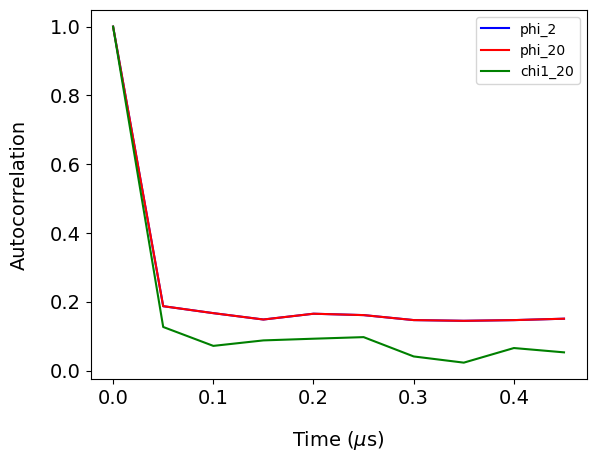

In [ ]:
def autocorr1(x, lags):
    '''numpy.corrcoef, partial'''
    corr = [1. if l == 0 else np.corrcoef(x[l:], x[:-l])[0][1] for l in lags]
    return np.array(corr)

# Define time in microseconds
time = np.linspace(0, 300, trj.n_frames)

# Define the lags for autocorrelation analysis
lags = range(10)

# Calculate autocorrelation for specific dihedral angles
phi2_acf = autocorr1(dihedral_dict['phi'][20], lags)
phi20_acf = autocorr1(dihedral_dict['phi'][20], lags)
chi20_acf = autocorr1(dihedral_dict['chi1'][20], lags)

# Plot autocorrelation functions
plt.plot(time[lags], phi2_acf, color='b', label='phi_2')
plt.plot(time[lags], phi20_acf, color='r', label='phi_20')
plt.plot(time[lags], chi20_acf, color='g', label='chi1_20')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()


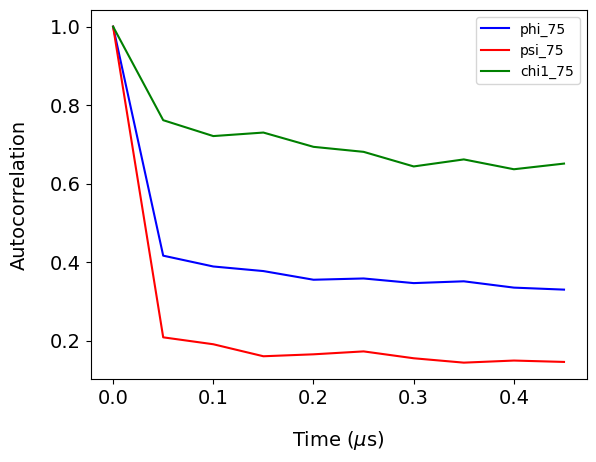

In [ ]:
###### 2.) Identify some dihedral angles that have very long correlation times? Can you your provide structural snapshots that explain why certain correlation times are longer?
#Lets Calculate Some Correlation Times of Some Dihedral angles.
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

#time in microseconds
time=np.linspace(0,300,trj.n_frames)


lags=range(10)
#C1C2bondlength[:,0]
phi75_acf=autocorr1(dihedral_dict['phi'][75],lags) #acf = autocorrelation fun
psi75_acf=autocorr1(dihedral_dict['psi'][75],lags)
chi75_acf=autocorr1(dihedral_dict['chi1'][75],lags)

plt.plot(time[lags],phi75_acf,color='b',label='phi_75')
plt.plot(time[lags],psi75_acf,color='r',label='psi_75')
plt.plot(time[lags],chi75_acf,color='g',label='chi1_75')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

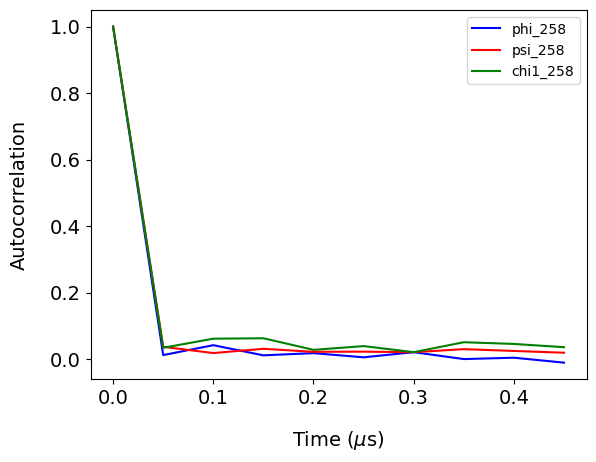

[ 1.00000000e+00  1.25899024e-02  4.23570351e-02  1.18205241e-02
  1.84451321e-02  5.89183324e-03  2.12912891e-02  5.87665092e-04
  4.70962360e-03 -1.01363949e-02]
[1.         0.0374151  0.01871488 0.03149104 0.02244083 0.02292042
 0.02131029 0.03040989 0.02501341 0.01966474]
[1.         0.03455008 0.06188386 0.06319564 0.02833058 0.03959519
 0.0214125  0.05121643 0.04607844 0.03635711]


In [ ]:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

#time in microseconds
time=np.linspace(0,300,trj.n_frames)


lags=range(10)
#C1C2bondlength[:,0]
phi258_acf=autocorr1(dihedral_dict['phi'][258],lags) #acf = autocorrelation fun
psi258_acf=autocorr1(dihedral_dict['psi'][258],lags)
chi258_acf=autocorr1(dihedral_dict['chi1'][258],lags)

plt.plot(time[lags],phi258_acf,color='b',label='phi_258')
plt.plot(time[lags],psi258_acf,color='r',label='psi_258')
plt.plot(time[lags],chi258_acf,color='g',label='chi1_258')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()
print(phi258_acf)
print(psi258_acf)
print(chi258_acf)

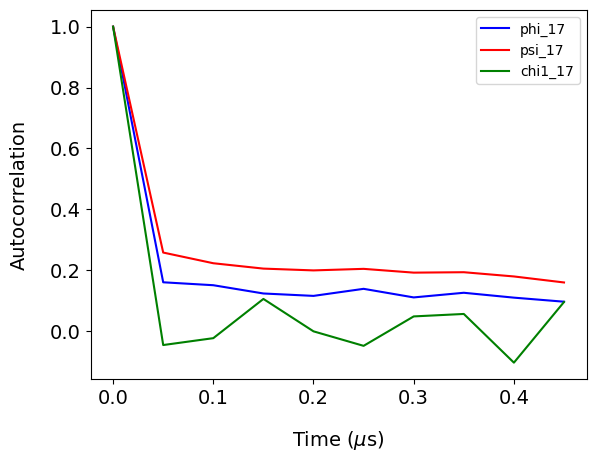

In [ ]:
###### 2.) Identify some dihedral angles that have very long correlation times? Can you your provide structural snapshots that explain why certain correlation times are longer?
#Lets Calculate Some Correlation Times of Some Dihedral angles.
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

#time in microseconds
time=np.linspace(0,300,trj.n_frames)


lags=range(10)
#C1C2bondlength[:,0]
phi17_acf=autocorr1(dihedral_dict['phi'][17],lags) #acf = autocorrelation fun
psi17_acf=autocorr1(dihedral_dict['psi'][17],lags)
chi17_acf=autocorr1(dihedral_dict['chi1'][17],lags)

plt.plot(time[lags],phi17_acf,color='b',label='phi_17')
plt.plot(time[lags],psi17_acf,color='r',label='psi_17')
plt.plot(time[lags],chi17_acf,color='g',label='chi1_17')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

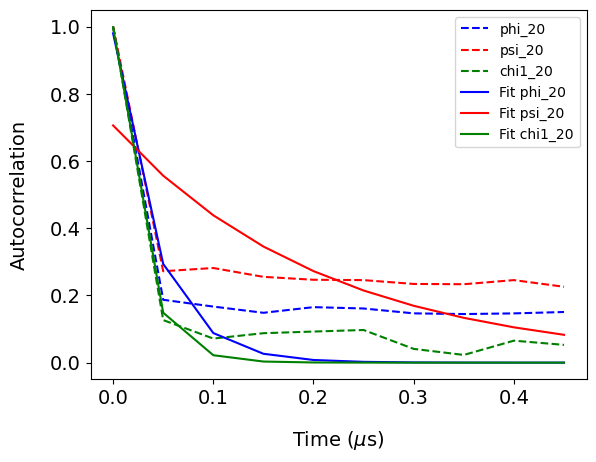

Correlation times:
phi_20: 0.041502240313277115
psi_20: 0.2100359461372258
chi1_20: 0.02624478023184705


In [ ]:
#2a Can you calculate/ fit the correlation times
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential_decay(t, tau, A):
    """Exponential decay function"""
    return A * np.exp(-t / tau)

def autocorr1(x, lags):
    '''numpy.corrcoef, partial'''
    corr = [1. if l == 0 else np.corrcoef(x[l:], x[:-l])[0][1] for l in lags]
    return np.array(corr)

# Define time in microseconds
time = np.linspace(0, 300, trj.n_frames)

# Define the lags for autocorrelation analysis
lags = range(10)

# Calculate autocorrelation for specific dihedral angles
phi20_acf = autocorr1(dihedral_dict['phi'][20], lags)
psi20_acf = autocorr1(dihedral_dict['psi'][20], lags)
chi20_acf = autocorr1(dihedral_dict['chi1'][20], lags)

# Fit exponential decay curve to autocorrelation data
popt_phi20, pcov_phi20 = curve_fit(exponential_decay, time[lags], phi20_acf)
popt_psi20, pcov_psi20 = curve_fit(exponential_decay, time[lags], psi20_acf)
popt_chi20, pcov_chi20 = curve_fit(exponential_decay, time[lags], chi20_acf)

# Plot autocorrelation functions against lag time
plt.plot(time[lags], phi20_acf, 'b--', label='phi_20')
plt.plot(time[lags], psi20_acf, 'r--', label='psi_20')
plt.plot(time[lags], chi20_acf, 'g--', label='chi1_20')

# Plot fitted curves
plt.plot(time[lags], exponential_decay(time[lags], *popt_phi20), 'b-', label='Fit phi_20')
plt.plot(time[lags], exponential_decay(time[lags], *popt_psi20), 'r-', label='Fit psi_20')
plt.plot(time[lags], exponential_decay(time[lags], *popt_chi20), 'g-', label='Fit chi1_20')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

# Extract correlation times from fitted parameters
tau_phi20 = popt_phi20[0]
tau_psi20 = popt_psi20[0]
tau_chi20 = popt_chi20[0]

print("Correlation times:")
print("phi_20:", tau_phi20)
print("psi_20:", tau_psi20)
print("chi1_20:", tau_chi20)


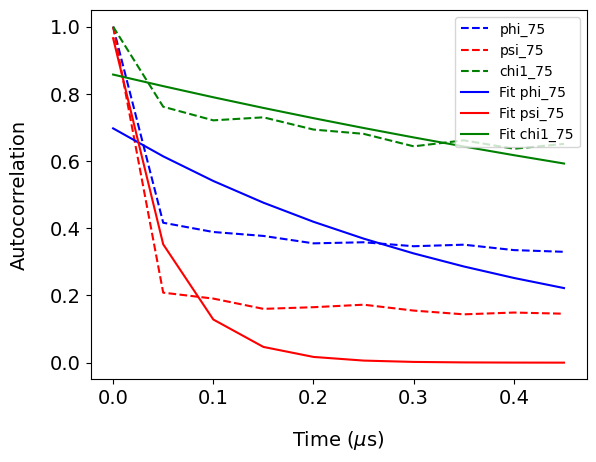

Correlation times:
phi_75: 0.39325004626202037
psi_75: 0.04959007804063059
chi1_75: 1.2188408164240945


In [ ]:
# Calculate autocorrelation for specific dihedral angles
phi75_acf = autocorr1(dihedral_dict['phi'][75], lags)
psi75_acf = autocorr1(dihedral_dict['psi'][75], lags)
chi75_acf = autocorr1(dihedral_dict['chi1'][75], lags)

# Fit exponential decay curve to autocorrelation data
popt_phi75, pcov_phi75 = curve_fit(exponential_decay, time[lags], phi75_acf)
popt_psi75, pcov_psi75 = curve_fit(exponential_decay, time[lags], psi75_acf)
popt_chi75, pcov_chi75 = curve_fit(exponential_decay, time[lags], chi75_acf)

# Plot autocorrelation functions against lag time
plt.plot(time[lags], phi75_acf, 'b--', label='phi_75')
plt.plot(time[lags], psi75_acf, 'r--', label='psi_75')
plt.plot(time[lags], chi75_acf, 'g--', label='chi1_75')

# Plot fitted curves
plt.plot(time[lags], exponential_decay(time[lags], *popt_phi75), 'b-', label='Fit phi_75')
plt.plot(time[lags], exponential_decay(time[lags], *popt_psi75), 'r-', label='Fit psi_75')
plt.plot(time[lags], exponential_decay(time[lags], *popt_chi75), 'g-', label='Fit chi1_75')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

# Extract correlation times from fitted parameters
tau_phi75 = popt_phi75[0]
tau_psi75 = popt_psi75[0]
tau_chi75 = popt_chi75[0]

print("Correlation times:")
print("phi_75:", tau_phi75)
print("psi_75:", tau_psi75)
print("chi1_75:", tau_chi75)


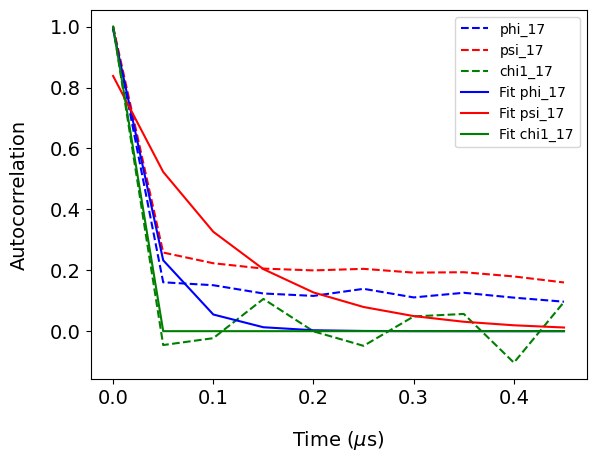

Correlation times:
phi_17: 0.034533782804089905
psi_17: 0.1060620958984671
chi1_17: 0.001221337708772944


In [ ]:
# Calculate autocorrelation for specific dihedral angles
phi17_acf = autocorr1(dihedral_dict['phi'][17], lags)
psi17_acf = autocorr1(dihedral_dict['psi'][17], lags)
chi17_acf = autocorr1(dihedral_dict['chi1'][17], lags)

# Fit exponential decay curve to autocorrelation data
popt_phi17, pcov_phi17 = curve_fit(exponential_decay, time[lags], phi17_acf)
popt_psi17, pcov_psi17 = curve_fit(exponential_decay, time[lags], psi17_acf)
popt_chi17, pcov_chi17 = curve_fit(exponential_decay, time[lags], chi17_acf)

# Plot autocorrelation functions against lag time
plt.plot(time[lags], phi17_acf, 'b--', label='phi_17')
plt.plot(time[lags], psi17_acf, 'r--', label='psi_17')
plt.plot(time[lags], chi17_acf, 'g--', label='chi1_17')

# Plot fitted curves
plt.plot(time[lags], exponential_decay(time[lags], *popt_phi17), 'b-', label='Fit phi_17')
plt.plot(time[lags], exponential_decay(time[lags], *popt_psi17), 'r-', label='Fit psi_17')
plt.plot(time[lags], exponential_decay(time[lags], *popt_chi17), 'g-', label='Fit chi1_17')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

# Extract correlation times from fitted parameters
tau_phi17 = popt_phi17[0]
tau_psi17 = popt_psi17[0]
tau_chi17 = popt_chi17[0]

print("Correlation times:")
print("phi_17:", tau_phi17)
print("psi_17:", tau_psi17)
print("chi1_17:", tau_chi17)


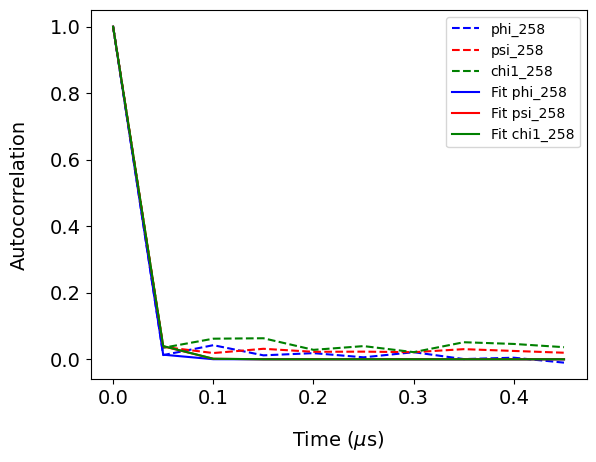

Correlation times:
phi_258: 0.01166733352020687
psi_258: 0.015402868835194303
chi1_258: 0.01549246955790665


In [ ]:
# Calculate autocorrelation for specific dihedral angles
phi258_acf = autocorr1(dihedral_dict['phi'][258], lags)
psi258_acf = autocorr1(dihedral_dict['psi'][258], lags)
chi258_acf = autocorr1(dihedral_dict['chi1'][258], lags)

# Fit exponential decay curve to autocorrelation data
popt_phi258, pcov_phi258 = curve_fit(exponential_decay, time[lags], phi258_acf)
popt_psi258, pcov_psi258 = curve_fit(exponential_decay, time[lags], psi258_acf)
popt_chi258, pcov_chi258 = curve_fit(exponential_decay, time[lags], chi258_acf)

# Plot autocorrelation functions against lag time
plt.plot(time[lags], phi258_acf, 'b--', label='phi_258')
plt.plot(time[lags], psi258_acf, 'r--', label='psi_258')
plt.plot(time[lags], chi258_acf, 'g--', label='chi1_258')

# Plot fitted curves
plt.plot(time[lags], exponential_decay(time[lags], *popt_phi258), 'b-', label='Fit phi_258')
plt.plot(time[lags], exponential_decay(time[lags], *popt_psi258), 'r-', label='Fit psi_258')
plt.plot(time[lags], exponential_decay(time[lags], *popt_chi258), 'g-', label='Fit chi1_258')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

# Extract correlation times from fitted parameters
tau_phi258 = popt_phi258[0]
tau_psi258 = popt_psi258[0]
tau_chi258 = popt_chi258[0]

print("Correlation times:")
print("phi_258:", tau_phi258)
print("psi_258:", tau_psi258)
print("chi1_258:", tau_chi258)


In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define autocorrelation function
def autocorr1(x, lags):
    '''numpy.corrcoef, partial'''
    corr = [1. if l == 0 else np.corrcoef(x[l:], x[:-l])[0][1] for l in lags]
    return np.array(corr)

# Generate time values
time = np.linspace(0, 300, trj.n_frames)

# Define lags for autocorrelation analysis
lags = range(10)

auto_corr_time_dict = {}
# Iterate over each residue in residues array
for angle in dihedral_dict.keys():
    for residue in dihedral_dict[angle].keys():
        # Calculate autocorrelation for each dihedral angle
        angle_acf = autocorr1(dihedral_dict[angle].get(residue, np.zeros(trj.n_frames)), lags)
    
        # Define a linear function for regression
        def linear_func(t, m, c):
            return m * t + c

        # Perform linear regression for each autocorrelation curve using the first two lag values
        linfit_angle, _ = curve_fit(linear_func, time[lags[:2]], angle_acf[:2])

        # Print the slopes
        print(f"Autocorrelation time for {angle} at residues {residue}: {-1/linfit_angle[0]}")
        if angle not in auto_corr_time_dict.keys(): \
            auto_corr_time_dict[angle]={}
        auto_corr_time_dict[angle][residue] = - 1/linfit_angle[0]
        

/var/folders/np/p_8hx6w53z9gtvwkrthry9x00000gn/T/ipykernel_41070/3524072629.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  linfit_angle, _ = curve_fit(linear_func, time[lags[:2]], angle_acf[:2])


Autocorrelation time for phi at residues 2: 0.20926982601170296
Autocorrelation time for phi at residues 3: 0.10192517784461255
Autocorrelation time for phi at residues 4: 0.14124844334555914
Autocorrelation time for phi at residues 5: 0.0862538482272834
Autocorrelation time for phi at residues 6: 0.07741591012205248
Autocorrelation time for phi at residues 7: 0.13871091996567003
Autocorrelation time for phi at residues 8: 0.08597423819181886
Autocorrelation time for phi at residues 9: 0.12831565842231923
Autocorrelation time for phi at residues 10: 0.3845211530946766
Autocorrelation time for phi at residues 11: 0.07236117501745265
Autocorrelation time for phi at residues 12: 0.05491130830108972
Autocorrelation time for phi at residues 13: 0.06085197966019226
Autocorrelation time for phi at residues 14: 0.05789077076877673
Autocorrelation time for phi at residues 15: 0.06029479704039571
Autocorrelation time for phi at residues 16: 0.06314135590843925
Autocorrelation time for phi at res

In [ ]:
dihedral_dict['phi'].keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

In [ ]:
dihedral_dict['psi'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [ ]:
dihedral_dict['chi1'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 2

In [ ]:
dihedral_dict['chi2'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 29, 32, 33, 35, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 60, 61, 62, 63, 64, 65, 69, 70, 71, 72, 74, 75, 76, 79, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 94, 96, 98, 103, 104, 105, 107, 109, 110, 113, 115, 116, 119, 120, 122, 123, 125, 126, 127, 128, 129, 130, 132, 133, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 161, 162, 164, 165, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 180, 182, 183, 185, 186, 187, 188, 191, 192, 194, 195, 196, 197, 198, 199, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 213, 214, 216, 219, 220, 221, 222, 223, 224, 226, 227, 228, 230, 231, 233, 234, 235, 237, 242, 243, 244, 245, 246, 247, 249, 250, 251, 253, 255, 256, 257, 258, 259, 261, 262, 263, 265])

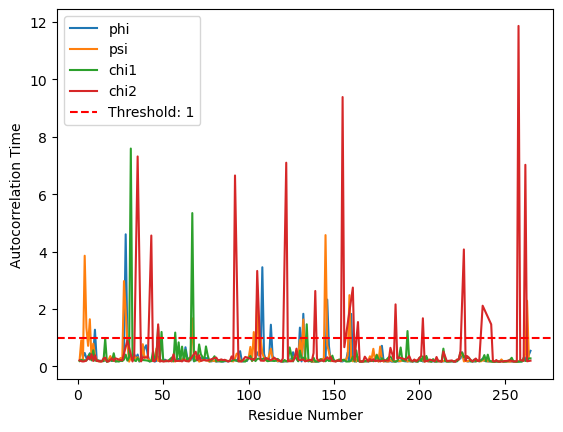

In [ ]:
import matplotlib.pyplot as plt

#define threshold
threshold = 1

for angle in auto_corr_time_dict.keys():
    a_corr_arr = []
    residues = list(auto_corr_time_dict[angle].keys())
    for residue in residues:
        a_corr_arr.append(auto_corr_time_dict[angle][residue])
    plt.plot(residues, a_corr_arr, label=angle)

plt.legend()
plt.xlabel('Residue Number')  # Label for the x-axis
plt.ylabel('Autocorrelation Time')  # Label for the y-axis
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')  # Add a horizontal line for the threshold
plt.legend()
plt.show()


/var/folders/np/p_8hx6w53z9gtvwkrthry9x00000gn/T/ipykernel_41070/2101356961.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_, pcov_ = curve_fit(linear_regression, time[lags][:2], np.log(dihedral_acf[:2]))


Residue phi_10 has correlation time longer than 0.2 microseconds: 0.3589365617072938 microseconds.
Residue phi_28 has correlation time longer than 0.2 microseconds: 1.3563604121479695 microseconds.
Residue phi_29 has correlation time longer than 0.2 microseconds: 0.2308005182645028 microseconds.
Residue phi_108 has correlation time longer than 0.2 microseconds: 1.0121629674451516 microseconds.
Residue phi_113 has correlation time longer than 0.2 microseconds: 0.41129961828446504 microseconds.
Residue phi_130 has correlation time longer than 0.2 microseconds: 0.3808805210978105 microseconds.
Residue phi_132 has correlation time longer than 0.2 microseconds: 0.5254317684661826 microseconds.
Residue phi_146 has correlation time longer than 0.2 microseconds: 0.673962919106004 microseconds.
Residue phi_160 has correlation time longer than 0.2 microseconds: 0.5241228851951946 microseconds.
Residue psi_2 has correlation time longer than 0.2 microseconds: 0.24845227266560155 microseconds.
Resi

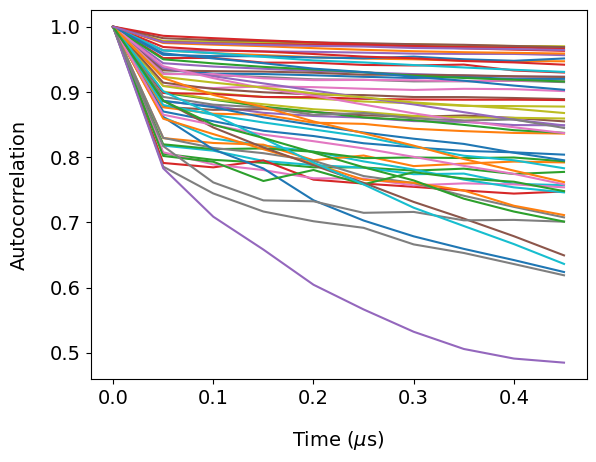

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define linear regression function
def linear_regression(x, m, c):
    return m * x + c

# Define your threshold value here (in microseconds)
threshold = 0.2

# List to store the residues with autocorrelation times greater than the threshold
residues_above_threshold = []

# Loop over all phi/psi/chi1/chi2 residues
for residue_type in ['phi', 'psi', 'chi1', 'chi2']:
    for residue_number, dihedral_data in dihedral_dict[residue_type].items():  
        # Calculate autocorrelation for each dihedral angle
        dihedral_acf = autocorr1(dihedral_data, lags)
        # Calculate correlation time (e.g., time for autocorrelation to decay to 0.1)
        correlation_time = 0
        if dihedral_acf[1] > 0: 
            popt_, pcov_ = curve_fit(linear_regression, time[lags][:2], np.log(dihedral_acf[:2]))
            correlation_time = -1/popt_[0]
            
            if correlation_time > threshold:
                residues_above_threshold.append((residue_type, residue_number, correlation_time))
                print(f"Residue {residue_type}_{residue_number} has correlation time longer than {threshold} microseconds: {correlation_time} microseconds.")

# Plotting only residues with correlation time greater than the threshold
for residue_type, residue_number, correlation_time in residues_above_threshold:
    dihedral_acf = autocorr1(dihedral_dict[residue_type][residue_number], lags)
    plt.plot(time[lags], dihedral_acf, label=f"{residue_type}_{residue_number}")

plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()


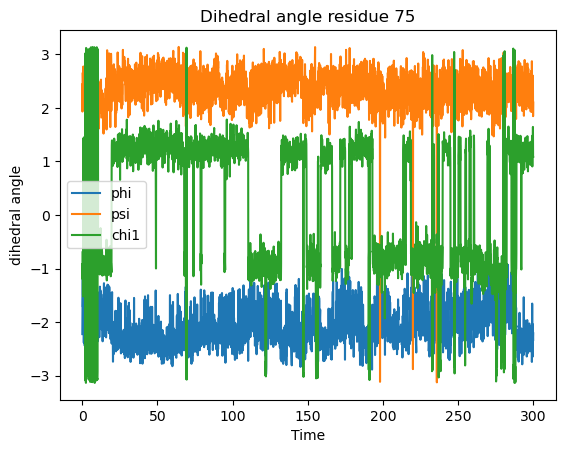

In [45]:
#oberservation of different conformations of dihedral angles that exist in residue 75
#this residue forms a saltbridge with the ligand. 
#This results show that the motion associated with the chi1 angle of the side chain of resid 75  samples a lot of rotamers
residue= 75
plt.plot(time[0:6000:2], dihedral_dict['phi'][75][0:6000:2], label='phi')
plt.plot(time[0:6000:2], dihedral_dict['psi'][75][0:6000:2], label='psi')
plt.plot(time[0:6000:2], dihedral_dict['chi1'][75][0:6000:2], label='chi1')

plt.legend()
plt.xlabel('Time')
plt.ylabel('dihedral angle')
plt.title('Dihedral angle residue 75')
plt.legend()
plt.show()

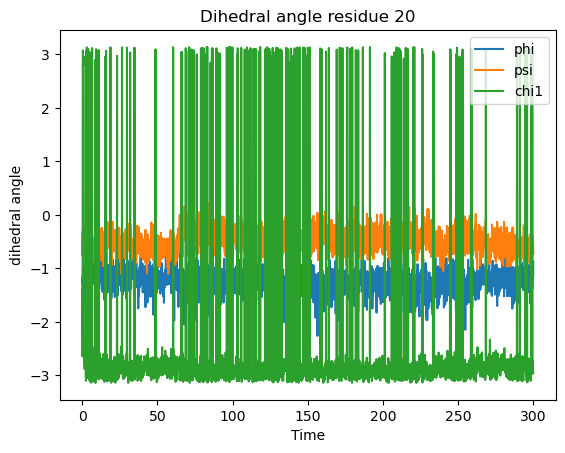

In [47]:
#forms a hydrogen bonds at two positions with the ligand
residue= 20
plt.plot(time[0:6000:2], dihedral_dict['phi'][20][0:6000:2], label='phi')
plt.plot(time[0:6000:2], dihedral_dict['psi'][20][0:6000:2], label='psi')
plt.plot(time[0:6000:2], dihedral_dict['chi1'][20][0:6000:2], label='chi1')

plt.legend()
plt.xlabel('Time')
plt.ylabel('dihedral angle')
plt.title('Dihedral angle residue 20')
plt.legend()
plt.show()

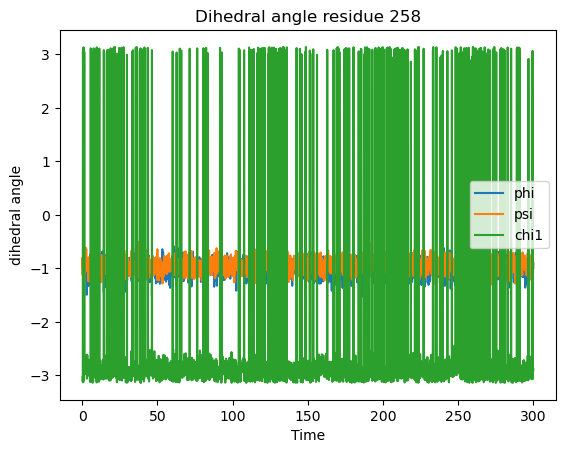

In [48]:
#forms hydrophobic interactions with the ligand
residue= 258
plt.plot(time[0:6000:2], dihedral_dict['phi'][258][0:6000:2], label='phi')
plt.plot(time[0:6000:2], dihedral_dict['psi'][258][0:6000:2], label='psi')
plt.plot(time[0:6000:2], dihedral_dict['chi1'][258][0:6000:2], label='chi1')

plt.legend()
plt.xlabel('Time')
plt.ylabel('dihedral angle')
plt.title('Dihedral angle residue 258')
plt.legend()
plt.show()

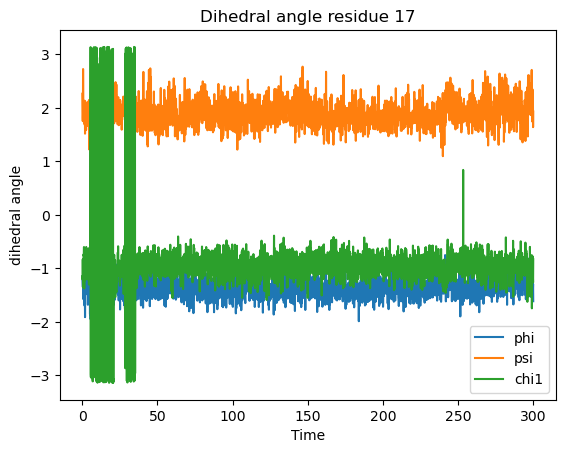

In [49]:
#forms hydrophobic interactions with the ligand
residue= 17
plt.plot(time[0:6000:2], dihedral_dict['phi'][17][0:6000:2], label='phi')
plt.plot(time[0:6000:2], dihedral_dict['psi'][17][0:6000:2], label='psi')
plt.plot(time[0:6000:2], dihedral_dict['chi1'][17][0:6000:2], label='chi1')

plt.legend()
plt.xlabel('Time')
plt.ylabel('dihedral angle')
plt.title('Dihedral angle residue 17')
plt.legend()
plt.show()

The 
Residues of interest is resid 13 and 33
Residue 13 and 33 shows large changes in the dihedral angles as observed in the plots above. Also the calculated correlation times shown in Q2, shows large correlation time difference. From the images above, the residue 13 is in the minor state is oberved to be in the opposite direction to the major state whilst that of 33 is all over the place and this shows how dynamic the the minor states are, which can be attributed to high degrees of freedom at those sites


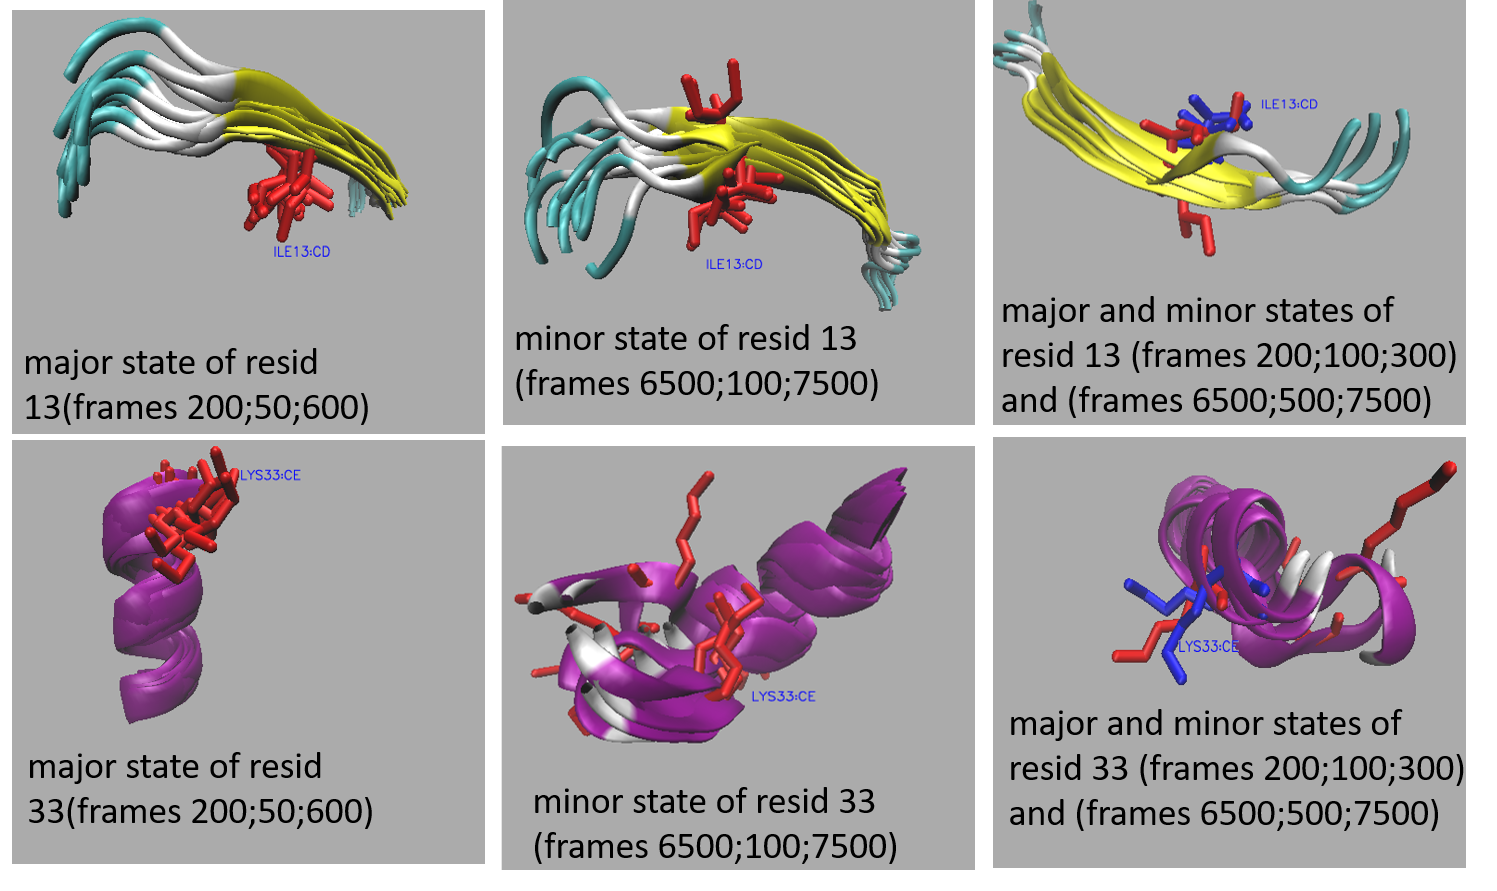

In [ ]:
# 4) Calculate the ciruclar correlation coefficients between phi and psi angles and reproduce the correlation map from below -Look into using a "mask" to eliminate some entries in the correlation matrix and make your plot prettier.
def circular_mean(angle):
    return np.arctan2(np.sum(np.sin(angle)),np.sum(np.cos(angle)))


def circular_corr(phi,psi):
    cmean1=circular_mean(phi)
    cmean2=circular_mean(psi)
    numerator=(np.sum(np.sin(phi-cmean1)*np.sin(psi-cmean2)))
    denom=((np.sum(np.sin(phi-cmean1)**2)*np.sum(np.sin(psi-cmean2)**2))**.5)
    ccor=numerator/denom
    return ccor

In [ ]:
# Make correlation contact map
correlation_maps = []
for i in range(2, 265):
    cor_map = []
    for j in range(2, 265):
        phi=dihedral_dict['phi'][i]
        psi=dihedral_dict['psi'][j]
        ccor=circular_corr(psi,phi)
        cor_map.append(ccor)
    correlation_maps.append(cor_map)
final_cor_map = np.asarray(correlation_maps).astype(float)
np.shape(final_cor_map)

(263, 263)

In [ ]:
sequence=[]
for residue in trj.topology.residues:
    sequence.append(residue)
len(sequence)
seq_trunc=sequence[1:266]
#Lets Zero Out some of the Labels 
n=10
for i in range (0,265): 
  if (i % n !=0):
   seq_trunc[i]=''
print(seq_trunc)
print(sequence)

[LYS2, '', '', '', '', '', '', '', '', '', ILE12, '', '', '', '', '', '', '', '', '', TYR22, '', '', '', '', '', '', '', '', '', ILE32, '', '', '', '', '', '', '', '', '', THR42, '', '', '', '', '', '', '', '', '', GLU52, '', '', '', '', '', '', '', '', '', GLN62, '', '', '', '', '', '', '', '', '', ILE72, '', '', '', '', '', '', '', '', '', ARG82, '', '', '', '', '', '', '', '', '', TYR92, '', '', '', '', '', '', '', '', '', CYS102, '', '', '', '', '', '', '', '', '', ALA112, '', '', '', '', '', '', '', '', '', PHE122, '', '', '', '', '', '', '', '', '', ARG132, '', '', '', '', '', '', '', '', '', SER142, '', '', '', '', '', '', '', '', '', GLU152, '', '', '', '', '', '', '', '', '', PHE162, '', '', '', '', '', '', '', '', '', LYS172, '', '', '', '', '', '', '', '', '', ILE182, '', '', '', '', '', '', '', '', '', ILE192, '', '', '', '', '', '', '', '', '', TYR202, '', '', '', '', '', '', '', '', '', SER212, '', '', '', '', '', '', '', '', '', LEU222, '', '', '', '', '', '', '', '', ''

In [ ]:
#Q5Make a 2D map showing the populations of hydrogen bonds between different residues.

hbonds = md.baker_hubbard(trj, periodic=False)
label = lambda hbond : '%s -- %s' % (trj.topology.atom(hbond[0]), trj.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))

LEU3-N -- GLU8-OE1
GLN5-N -- GLN5-OE1
ASN6-N -- LEU3-O
ASN6-N -- ASN6-OD1
ILE7-N -- LYS4-O
GLU8-N -- LYS4-O
LYS9-N -- GLU8-OE1
LYS9-N -- GLU8-OE2
GLU10-N -- GLU8-O
GLU10-N -- LYS63-O
ILE11-N -- GLU10-OE1
ILE11-N -- GLU10-OE2
ILE12-N -- LEU61-O
ILE14-N -- VAL59-O
ASN15-N -- PHE251-O
ASN16-N -- SER58-OG
ASN16-ND2 -- HIS250-O
ILE17-N -- ILE57-O
ILE19-N -- ILE55-O
HIS20-N -- ARG18-O
HIS20-N -- LIG266-O1
HIS20-N -- LIG266-O2
HIS20-NE2 -- GLU171-OE1
HIS20-NE2 -- GLU171-OE2
GLN21-N -- LIG266-O1
GLN21-N -- LIG266-O2
GLN21-NE2 -- LEU76-O
THR23-N -- LEU51-O
VAL24-N -- ILE74-O
LEU25-N -- ILE49-O
TYR26-N -- ILE72-O
THR27-N -- GLU47-O
SER28-N -- TYR26-O
ASN29-N -- SER28-OG
ASN29-N -- PRO70-O
ASN29-ND2 -- LYS65-O
ASN29-ND2 -- ASN69-O
CYS30-N -- THR27-O
CYS30-N -- SER28-O
CYS30-N -- PRO70-O
THR31-N -- GLN62-O
ILE32-N -- LEU44-O
ASP33-N -- ARG60-O
VAL34-N -- THR42-O
TYR35-N -- SER58-O
THR36-N -- ASN41-OD1
GLU38-N -- THR36-OG1
GLY39-N -- THR36-OG1
GLY39-N -- THR36-O
SER40-N -- LYS107-O
ASN41-N -- GLY39

In [ ]:
np.shape(hbonds)

(440, 3)

In [ ]:

for hbond in hbonds:
 donor = top.atom(hbond[0])
 acc = top.atom(hbond[2])
 print(hbond,donor,acc)

[ 41  42 143] LEU3-N GLU8-OE1
[82 83 93] GLN5-N GLN5-OE1
[ 99 100  59] ASN6-N LEU3-O
[ 99 100 107] ASN6-N ASN6-OD1
[113 114  81] ILE7-N LYS4-O
[132 133  81] GLU8-N LYS4-O
[147 148 143] LYS9-N GLU8-OE1
[147 148 144] LYS9-N GLU8-OE2
[169 170 146] GLU10-N GLU8-O
[ 169  170 1083] GLU10-N LYS63-O
[184 185 180] ILE11-N GLU10-OE1
[184 185 181] ILE11-N GLU10-OE2
[ 203  204 1044] ILE12-N LEU61-O
[ 244  245 1001] ILE14-N VAL59-O
[ 263  264 4152] ASN15-N PHE251-O
[277 278 982] ASN16-N SER58-OG
[ 286  288 4132] ASN16-ND2 HIS250-O
[291 292 974] ILE17-N ILE57-O
[334 335 941] ILE19-N ILE55-O
[353 354 333] HIS20-N ARG18-O
[ 353  354 4392] HIS20-N LIG266-O1
[ 353  354 4394] HIS20-N LIG266-O2
[ 364  365 2807] HIS20-NE2 GLU171-OE1
[ 364  365 2808] HIS20-NE2 GLU171-OE2
[ 370  371 4392] GLN21-N LIG266-O1
[ 370  371 4394] GLN21-N LIG266-O2
[ 382  384 1307] GLN21-NE2 LEU76-O
[408 409 876] THR23-N LEU51-O
[ 422  423 1264] VAL24-N ILE74-O
[438 439 837] LEU25-N ILE49-O
[ 457  458 1235] TYR26-N ILE72-O
[478 479 

In [ ]:

# Assuming trj is properly defined before this point
# trj = ...

# Get the number of residues
num_residues = trj.n_residues

# Get the number of frames
frames = range(trj.n_frames)

# Initialize a square matrix to store the count of hydrogen bonds for each residue
hbond_population_matrix = np.zeros((num_residues, num_residues), dtype=int)

# Iterate over each frame
for frame in frames:
    # Calculate the hydrogen bonds for the current frame
    hbonds = md.baker_hubbard(trj[frame], periodic=False)
    
    # Iterate over each hydrogen bond in the current frame
    for hbond in hbonds:
        # Get the donor and acceptor atoms
        donor_index = hbond[0]
        acceptor_index = hbond[2]
        
        # Initialize variables to store donor and acceptor residues
        donor_residue = None
        acceptor_residue = None
        
        # Iterate over each residue to find the donor and acceptor residues
        for residue in trj.topology.residues:
            # Check if the donor atom belongs to this residue
            if donor_index in [atom.index for atom in residue.atoms]:
                donor_residue = residue.index
                
            # Check if the acceptor atom belongs to this residue
            if acceptor_index in [atom.index for atom in residue.atoms]:
                acceptor_residue = residue.index

        # Increment the count in the matrix if both donor and acceptor residues are found
        if donor_residue is not None and acceptor_residue is not None:
            hbond_population_matrix[donor_residue, acceptor_residue] += 1
            hbond_population_matrix[acceptor_residue, donor_residue] += 1

# Print the hydrogen bond matrix
print(hbond_population_matrix)

print(donor_index)
print(acceptor_index)
print(donor_residue)
print(acceptor_residue)
print(frames)

[[  2   3  82 ...   0   0   0]
 [  3   6 102 ...   0   0   0]
 [ 82 102   0 ...   0   0   0]
 ...
 [  0   0   0 ...  56 414   0]
 [  0   0   0 ... 414 544   0]
 [  0   0   0 ...   0   0   0]]
4394
333
265
17
range(0, 6000)


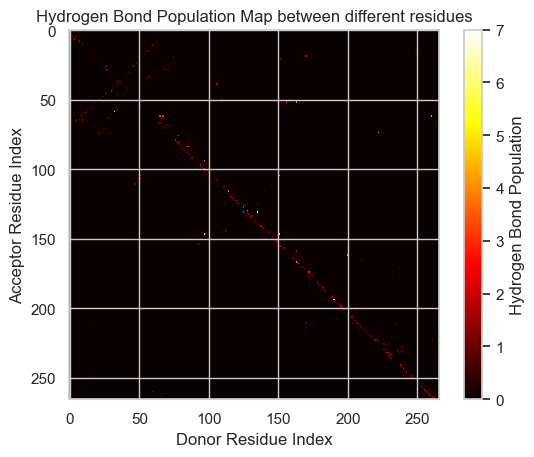

In [60]:
def calculate_hbond_population(trj):
    hbond_populations = np.zeros((trj.topology.n_residues, trj.topology.n_residues), dtype=int)
    for hbond in md.baker_hubbard(trj, periodic=False):
        donor_residue = trj.topology.atom(hbond[0]).residue.index
        acceptor_residue = trj.topology.atom(hbond[2]).residue.index
        hbond_populations[donor_residue, acceptor_residue] += 1
    return hbond_populations

def plot_hbond_map(hbond_populations):
    plt.imshow(hbond_populations, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Hydrogen Bond Population')
    plt.xlabel('Donor Residue Index')
    plt.ylabel('Acceptor Residue Index')
    plt.title('Hydrogen Bond Population Map between different residues')
    plt.show()
    #plt.invert_yaxis()

# Calculate hydrogen bond populations
hbond_populations = calculate_hbond_population(trj)

# Plot the hydrogen bond map
plot_hbond_map(hbond_populations)

In [ ]:
print(hbond_populations)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


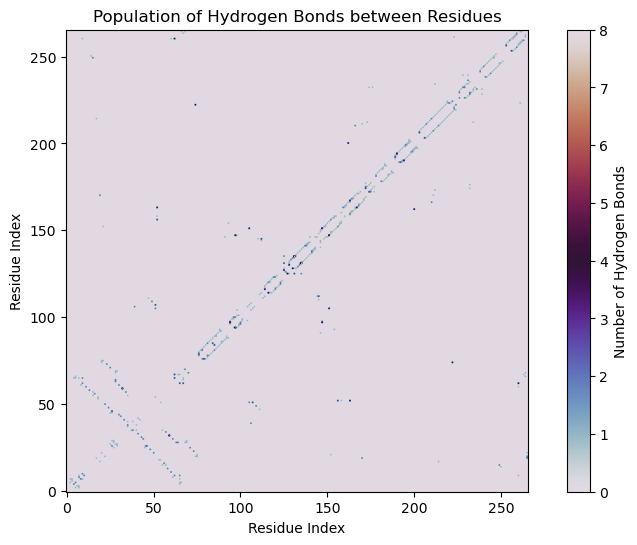

In [ ]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Calculate hydrogen bonds
hbonds = md.baker_hubbard(trj, periodic=False)

# Get the maximum residue index
max_residue_index = max(trj.topology.residue(i).index for i in range(trj.n_residues)) + 1

# Initialize a matrix to store the count of hydrogen bonds for each residue
residue_hbond_count = np.zeros((max_residue_index, max_residue_index))

# Loop through each hydrogen bond
for hbond in hbonds:
    # Get the indices of the atoms involved in the hydrogen bond
    donor_index = hbond[0]
    acceptor_index = hbond[2]
    
    # Get the residue indices of the donor and acceptor atoms
    donor_residue_index = trj.topology.atom(donor_index).residue.index
    acceptor_residue_index = trj.topology.atom(acceptor_index).residue.index
    
    # Increment the count for the donor and acceptor residues
    residue_hbond_count[donor_residue_index, acceptor_residue_index] += 1
    residue_hbond_count[acceptor_residue_index, donor_residue_index] += 1

# Plotting 2D colormap
plt.figure(figsize=(10, 6))
plt.imshow(residue_hbond_count, cmap='twilight', origin='lower')
plt.colorbar(label='Number of Hydrogen Bonds')
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
plt.title('Population of Hydrogen Bonds between Residues')
plt.grid(False)
plt.show()


In [61]:
import pyblock
from itertools import chain
def histo_blockerror(a, x0, xmax, bins, blocks):
    histo, xedges = np.histogram(
        a, bins=bins, range=[x0, xmax], density=True, weights=None)
    xcenters = xedges[:-1] + np.diff(xedges)/2
    Ind = chunkIt(len(a), blocks)
    block_size = (Ind[0][1]-Ind[0][0])
    hist_blocks = []
    for i in range(0, len(Ind)):
        block_data = a[Ind[i][0]:Ind[i][1]]
        hist, binedges = np.histogram(block_data, bins=bins, range=[
                                      x0, xmax], density=True, weights=None)
        hist_blocks.append(hist)
    hist_blocks = np.array(hist_blocks)
    average = np.average(hist_blocks, axis=0)
    variance = np.var(hist_blocks, axis=0)
    N = len(hist_blocks)
    error = np.sqrt(variance / N)
    return average, xcenters, error
def chunkIt(a, num):
    avg = a / float(num)
    out = []
    last = 0.0
    while last < a-1:
        out.append([int(last), int(last+avg)])
        last += avg
    return out
def free_energy_1D_blockerror(a, T, x0, xmax, bins, blocks):
    histo, xedges = np.histogram(
        a, bins=bins, range=[x0, xmax], density=True, weights=None)
    max = np.max(histo)
    # free_energy=-(0.001987*T)*np.log(histo)
    free_energy = -(0.001987*T)*np.log(histo+.000001)
    free_energy = free_energy-np.min(free_energy)
    xcenters = xedges[:-1] + np.diff(xedges)/2
    Ind = chunkIt(len(a), blocks)
    block_size = (Ind[0][1]-Ind[0][0])
    hist_blocks = []
    for i in range(0, len(Ind)):
        block_data = a[Ind[i][0]:Ind[i][1]]
        hist, binedges = np.histogram(block_data, bins=bins, range=[
                                      x0, xmax], density=True, weights=None)
        hist_blocks.append(hist)
    hist_blocks = np.array(hist_blocks)
    average = np.average(hist_blocks, axis=0)
    variance = np.var(hist_blocks, axis=0)
    N = len(hist_blocks)
    error = np.sqrt(variance / N)
    ferr = -(0.001987*T)*(error / average)
    return free_energy, xcenters, ferr

/var/folders/np/p_8hx6w53z9gtvwkrthry9x00000gn/T/ipykernel_886/363976743.py:50: RuntimeWarning: invalid value encountered in divide
  ferr = -(0.001987*T)*(error / average)
/opt/anaconda3/envs/AggR_DA_MD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/AggR_DA_MD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


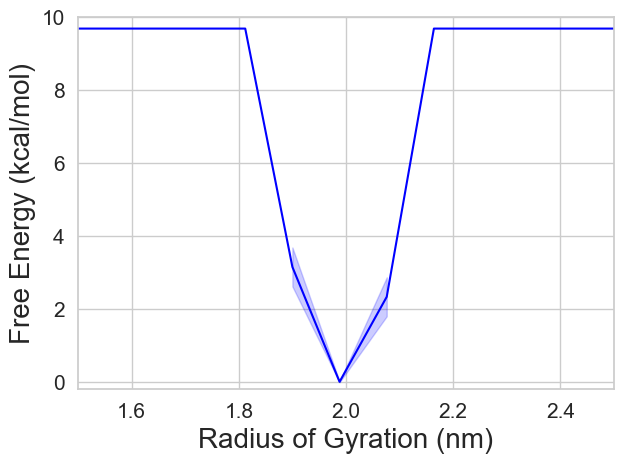

In [64]:
dG, bin_centers, ferr = free_energy_1D_blockerror(rg, 300, 0.8, 3.0, 25, 5)
sns.lineplot(x=bin_centers, y=dG, color='blue')
plt.fill_between(bin_centers, dG-ferr, dG+ferr, color='blue', alpha=0.2)
plt.ylim(-0.2, 10)
plt.xlim(1.5, 2.5)
plt.xlabel('Radius of Gyration (nm)', size=20)
plt.ylabel('Free Energy (kcal/mol)', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='15')
plt.yticks(size='15')
plt.tight_layout()
np.savetxt(outdir+ 'AggR_DA_rg.dG.err.dat', np.column_stack((bin_centers, dG, ferr)))
plt.tight_layout()
plt.savefig('%s/Rg.dG.pdf' % outdir)
plt.show()